## Import Libraries

In [27]:
# Data Analysis      
import pandas as pd          # data analysis library for handling structured data             
import numpy as np           # mathematical library for working with numerical data
import os, sys

# from metrics import *
# Add the previous directory to sys.path
sys.path.append(os.path.abspath('../'))

import os 

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
import missingno as msno    #visualize missing data
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000) 




In [2]:
root_dir = r"C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research\titer\jackson Data"
os.chdir(root_dir)

In [3]:
CHOS_april = pd.read_excel('CHOS Data for OU.xlsx', sheet_name =  'CHOS Nucleoside_29APR22', header = 1)
CHOS_june = pd.read_excel('CHOS Data for OU.xlsx', sheet_name =  'CHOS Nucleoside_17JUN22', header = 1)
CHOS_may = pd.read_excel('CHOS Data for OU.xlsx', sheet_name =  'CHOS Nucleoside_20MAY22', header = 1)
CHOS_mock = pd.read_excel('CHOS Data for OU.xlsx', sheet_name =  'CHOS Train-Mock Run SBC', header = 1)
CHOS_clone = pd.read_excel('CHOS Data for OU.xlsx', sheet_name =  'CHOS-Clone 9 Trial Run', header = 1)
CHOS_train_mock = pd.read_excel('CHOS Data for OU.xlsx', sheet_name =  'CHOS Train-Mock Run KBL', header = 1)
CHOS_camp_1 = pd.read_excel('CHOS Data for OU.xlsx', sheet_name =  'CHOS Camp 1 KBL', header = 1)


CHOKC_clone = pd.read_excel('CHOKC Data for OU.xlsx', sheet_name =  'CHOKC-Clone Production Stud', header = 1)
CHOKC_seed_feed = pd.read_excel('CHOKC Data for OU.xlsx', sheet_name =  'CHOKC Seed & feed optimization', header = 1)
CHOKC_metalytics = pd.read_excel('CHOKC Data for OU.xlsx', sheet_name =  'CHOKC-Metalytics', header = 1)
CHOKC_bioreactors = pd.read_excel('CHOKC Data for OU.xlsx', sheet_name =  'CHOKC-Bioreactors-SBC')

In [4]:
# CHOKC_clone

## Preprocessing

In [5]:
def drop_columns(dataframe, columns_to_drop):
    """
    Removes specified columns from a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame from which columns will be removed.
    - columns_to_drop (list of str): A list of column names to be dropped.

    Returns:
    - pd.DataFrame: A new DataFrame with the specified columns removed.
    """
    # Filter the list to only include columns that are present in the DataFrame
    columns_to_drop = [col for col in columns_to_drop if col in dataframe.columns]

    # Drop the columns and return the new DataFrame
    return dataframe.drop(columns=columns_to_drop)


def rename_columns(dataframe, rename_map, columns_to_drop):
    """
    Renames specified columns in a DataFrame according to a provided mapping, after dropping specified columns.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame in which columns will be renamed.
    - rename_map (dict): A dictionary where keys are old column names and values are new column names.
    - columns_to_drop (list of str): A list of column names to be dropped if present.

    Returns:
    - pd.DataFrame: A new DataFrame with the columns renamed, if they were present before being renamed.
    """
    # Drop specified columns if they exist
    dataframe = drop_columns(dataframe, columns_to_drop)

    # Filter the rename map to include only columns that are currently in the DataFrame
    filtered_rename_map = {old_col: new_col for old_col, new_col in rename_map.items() if old_col in dataframe.columns}

    # Rename the columns and return the new DataFrame
    return dataframe.rename(columns=filtered_rename_map)

> For CHOS datasets

In [6]:
var_drop = ['Vessel Type', 'Vessel Name', 'Supplement','Supplement.1', 'Media\n Type', 'Feed Type', 'Unnamed: 14','Feeding\nInterval',
            'Notes', 'Unnamed: 13', 'Glucose Trigger LImit (g/L)', 'pH Setpoint', 'Target Cell Seeding\n Density (cells/mL)']

rename_cols = {'Feed\nAdded %': 'feed_added_%', 'Viable \nCell\n Density \n(cells/mL)': 'viable_cell_density', 'Cell Viability (%)': 'cell_viability', 
               'Average Cell  Diameter (µM)': 'avg_cell_diam_µM', 'Titer by Octet (mg/L)': 'titer_octet_mgl', 'Glutamine \nmM': 'glutamine_mM',
               'Glutamate \nmM': 'glutamate_mM', 'Ammonium  \nmM': 'ammonia_mM', 'Lactate  \ng/L': 'lactate_ngl', 'Glucose \ng/L': 'glucose_g/L',
               'Sodium \nmM': 'sodium_mM', 'Pottasium  \nmM': 'potassium_mM', 'Calcium\nmM': 'calcium_mM', 'Osmolality\nmOsm/kg':'osmolality',
               'Bicarbonate\nmM': 'bicarbonate_mM', 'Air Saturation\n %':'air_saturation_%', 'CO2 Saturation \n%': 'CO2_saturation_%',
               'Average Cell Diameter (µM)': 'avg_cell_diam_µM', 'Glutamine  \nmM':'glutamine_mM', 'Glutamate  \nmM':'glutamate_mM',
               'Production Day':'production_day', }


# CHOS_april = rename_columns(CHOS_april, rename_cols, var_drop)
# CHOS_june = rename_columns(CHOS_june, rename_cols, var_drop)
# CHOS_may = rename_columns(CHOS_may, rename_cols, var_drop)
# CHOS_mock = rename_columns(CHOS_mock, rename_cols, var_drop)
# CHOS_clone = rename_columns(CHOS_clone, rename_cols, var_drop)
# CHOS_train_mock = rename_columns(CHOS_train_mock, rename_cols, var_drop)
# CHOS_camp_1 = rename_columns(CHOS_camp_1, rename_cols, var_drop)


> For CHOKC datasets

In [7]:
import re 

def clean_numeric_columns(df, col_clean, rename_cols, var_drop):
    """
    Cleans specified columns in a DataFrame by removing non-numeric characters 
    (except decimal points and negative signs) from the end of strings and converts 
    them to floats.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data to be cleaned.
    - columns (list of str): List of column names to clean.

    Returns:
    - pd.DataFrame: The DataFrame with cleaned numeric columns.
    """
    df = rename_columns(df, rename_cols, var_drop)
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()
    
    # Regex to find and remove non-numeric characters from the end of strings
    regex_pattern = r'([+-]?\d+(\.\d+)?)\D*$'
    
    for column in col_clean:
        if column in df_cleaned.columns:
            # Apply regex to each value in the column, extract the numeric part
            df_cleaned[column] = df_cleaned[column].astype(str).apply(lambda x: re.findall(regex_pattern, x)[0][0] if re.findall(regex_pattern, x) else x)
            # Convert the cleaned strings to floats
            df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

    # Replace "Too Low" with NaN in all columns if it exists
    for col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].replace("Too Low", np.nan)
        
    return df_cleaned


CHOS_april = clean_numeric_columns(CHOS_april, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOS_june = clean_numeric_columns(CHOS_june, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOS_may = clean_numeric_columns(CHOS_may, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOS_mock = clean_numeric_columns(CHOS_mock, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOS_clone = clean_numeric_columns(CHOS_clone, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOS_train_mock = clean_numeric_columns(CHOS_train_mock, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOS_camp_1 = clean_numeric_columns(CHOS_camp_1, ['Temp', 'feed_added_%'], rename_cols, var_drop)


CHOKC_clone = clean_numeric_columns(CHOKC_clone, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOKC_seed_feed = clean_numeric_columns(CHOKC_seed_feed, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOKC_metalytics = clean_numeric_columns(CHOKC_metalytics, ['Temp', 'feed_added_%'], rename_cols, var_drop)
CHOKC_bioreactors = clean_numeric_columns(CHOKC_bioreactors, ['Temp', 'feed_added_%'], rename_cols, var_drop)


> Align Columns

In [8]:

# List of your DataFrames
dataframes = {
    'CHOS_april': CHOS_april,
    'CHOS_june': CHOS_june,
    'CHOS_may': CHOS_may,
    'CHOS_mock': CHOS_mock,
    'CHOS_clone': CHOS_clone,
    'CHOS_train_mock': CHOS_train_mock,
    'CHOS_camp_1': CHOS_camp_1
}

# Determine the standard set of columns (e.g., using the union of all columns)
standard_columns = sorted(set().union(*(df.columns for df in dataframes.values())))

# Function to reorder and align columns in a DataFrame to the standard set
def align_columns(dataframe, columns):
    """
    Reorder and align DataFrame columns to a standard column order.

    Parameters:
    - dataframe (pd.DataFrame): DataFrame to be aligned.
    - columns (list of str): Standard list of columns to be aligned to.

    Returns:
    - pd.DataFrame: DataFrame with columns aligned as per the standard list.
    """
    # Add missing columns with NaN values
    for column in columns:
        if column not in dataframe.columns:
            dataframe[column] = pd.NA
    
    # Reorder columns and return
    return dataframe[columns]

# Aligning all DataFrames
for key in dataframes:
    dataframes[key] = align_columns(dataframes[key], standard_columns)

# Update the original DataFrame variables with the aligned DataFrames
CHOS_april, CHOS_june, CHOS_may, CHOS_mock, CHOS_clone, CHOS_train_mock, CHOS_camp_1 = (
    dataframes['CHOS_april'], dataframes['CHOS_june'], dataframes['CHOS_may'],
    dataframes['CHOS_mock'], dataframes['CHOS_clone'], dataframes['CHOS_train_mock'],
    dataframes['CHOS_camp_1']
)

In [9]:
# CHOS_clone

In [10]:
dataframes_okc = {
    'CHOKC_clone': CHOKC_clone,
    'CHOKC_seed_feed': CHOKC_seed_feed,
    'CHOKC_metalytics': CHOKC_metalytics,
    'CHOKC_bioreactors': CHOKC_bioreactors,
}

# Determine the standard set of columns (e.g., using the union of all columns)
standard_columns_okc = sorted(set().union(*(df.columns for df in dataframes_okc.values())))

# Aligning all DataFrames
for key in dataframes_okc:
    dataframes_okc[key] = align_columns(dataframes_okc[key], standard_columns_okc)

# Update the original DataFrame variables with the aligned DataFrames
CHOKC_clone, CHOKC_seed_feed, CHOKC_metalytics, CHOKC_bioreactors = (
    dataframes_okc['CHOKC_clone'], dataframes_okc['CHOKC_seed_feed'], dataframes_okc['CHOKC_metalytics'], 
    dataframes_okc['CHOKC_bioreactors']
)

> Visualize Titer by Octet

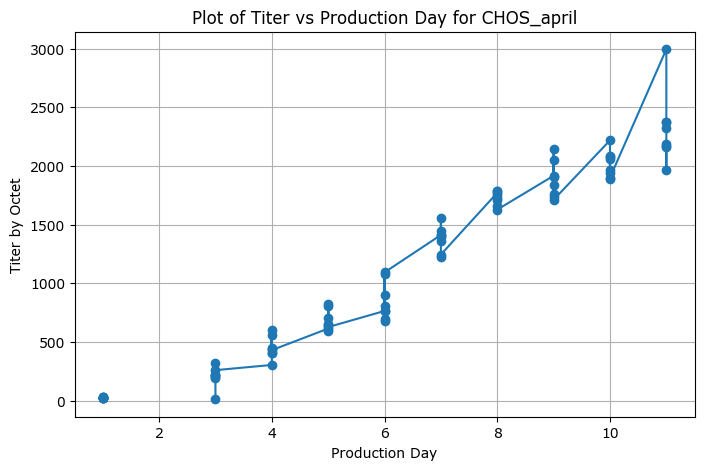

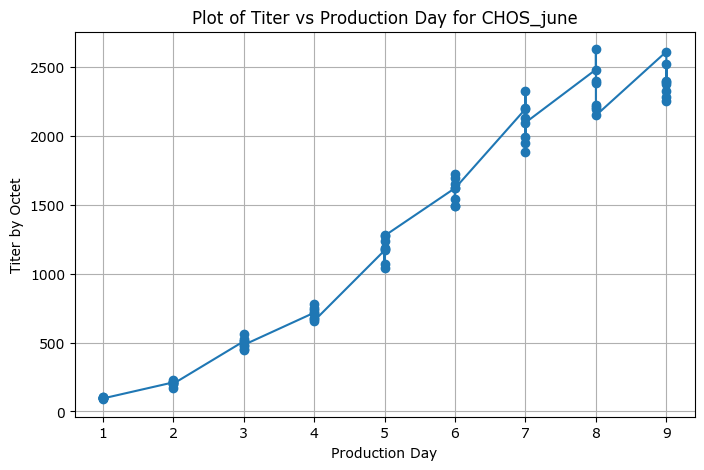

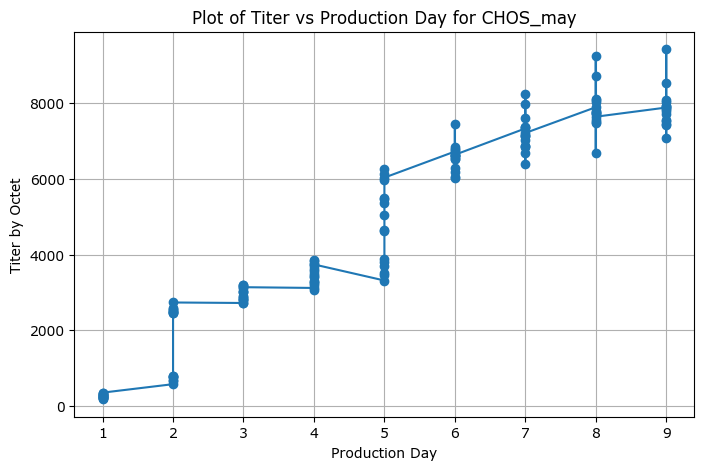

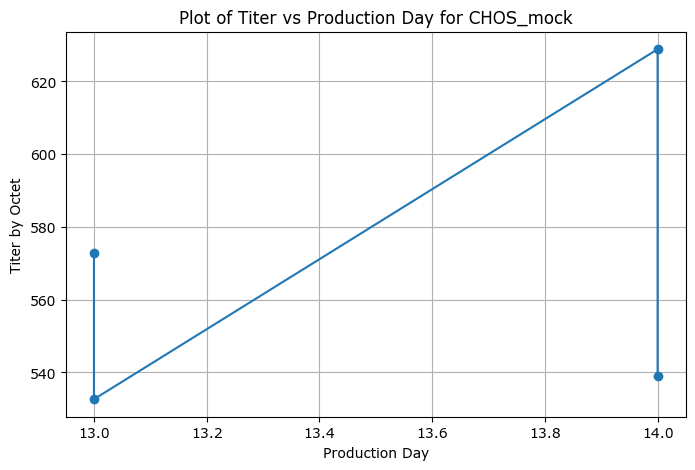

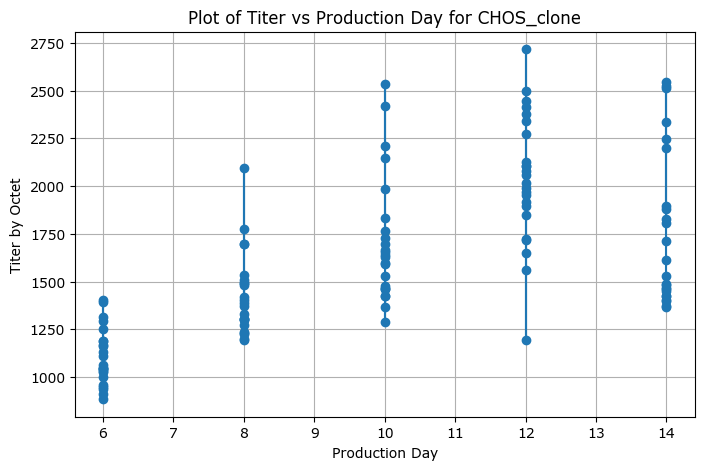

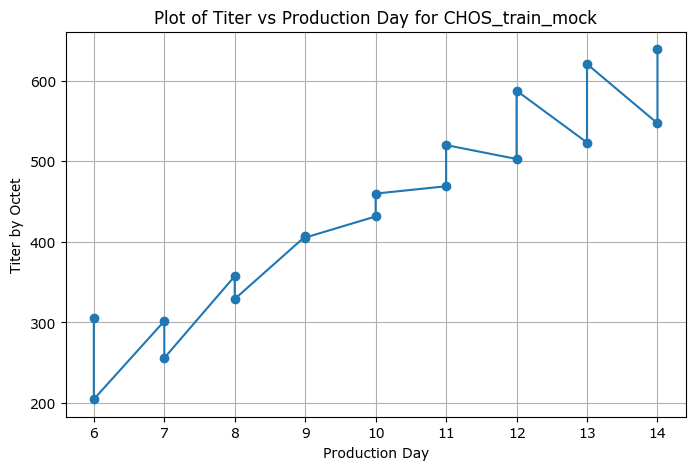

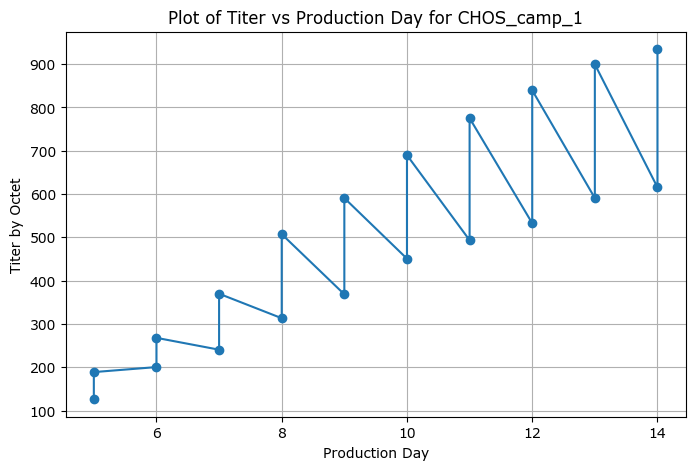

In [11]:
import matplotlib.pyplot as plt

def plot_dataframe_line(df, x_col, y_col, xlabel='X Axis', ylabel='Y Axis', title='Line Plot'):
    """
    Plots a line graph from a DataFrame using specified columns for x and y data.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data to plot.
    - x_col (str): Column name for the x-axis data.
    - y_col (str): Column name for the y-axis data.
    - xlabel (str, optional): Label for the x-axis.
    - ylabel (str, optional): Label for the y-axis.
    - title (str, optional): Title of the graph.

    Returns:
    - None: Displays the line plot.
    """
    if df[x_col].dtype == 'object':
        df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
    if df[y_col].dtype == 'object':
        df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
        
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.plot(df[x_col], df[y_col], marker='o')  # Plot the line with circle markers
    plt.xlabel(xlabel)  # Set the label for the x-axis
    plt.ylabel(ylabel)  # Set the label for the y-axis
    plt.title(title)  # Set the title of the plot
    plt.grid(True)  # Enable grid for better readability
    plt.show()  # Display the plot


for name, df in dataframes.items():
    if 'production_day' in df.columns and 'titer_octet_mgl' in df.columns:
        plot_dataframe_line(df, 'production_day', 'titer_octet_mgl', xlabel='Production Day', ylabel='Titer by Octet', title=f'Plot of Titer vs Production Day for {name}')

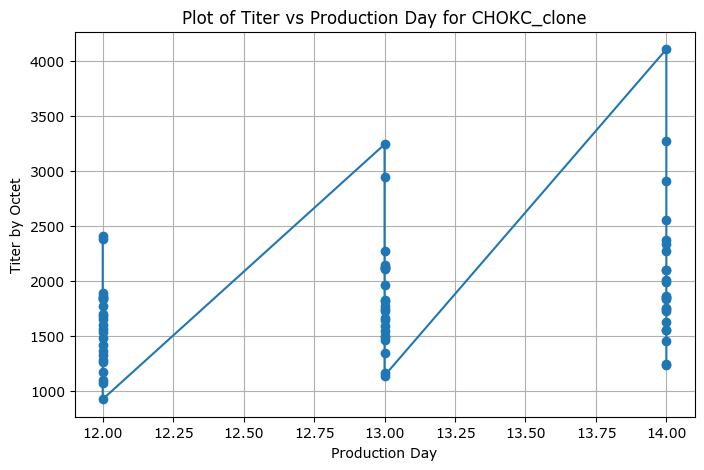

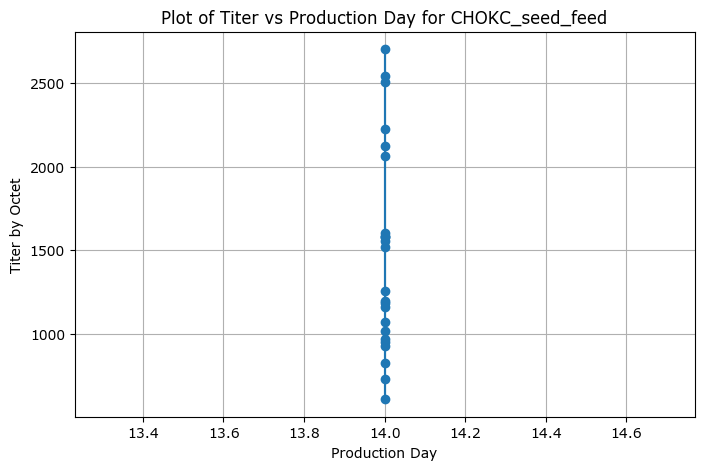

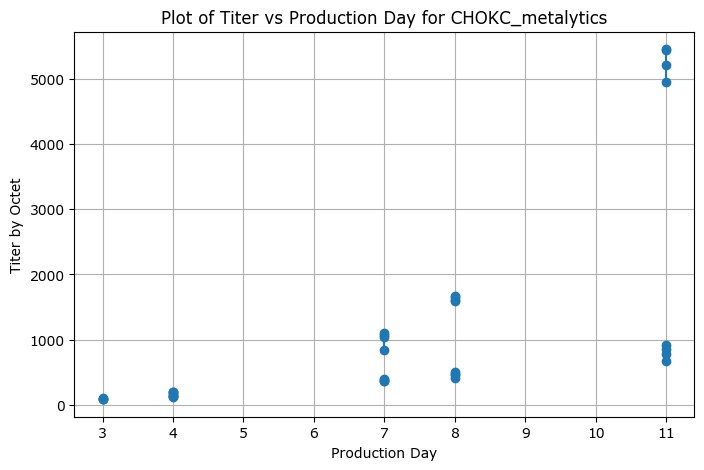

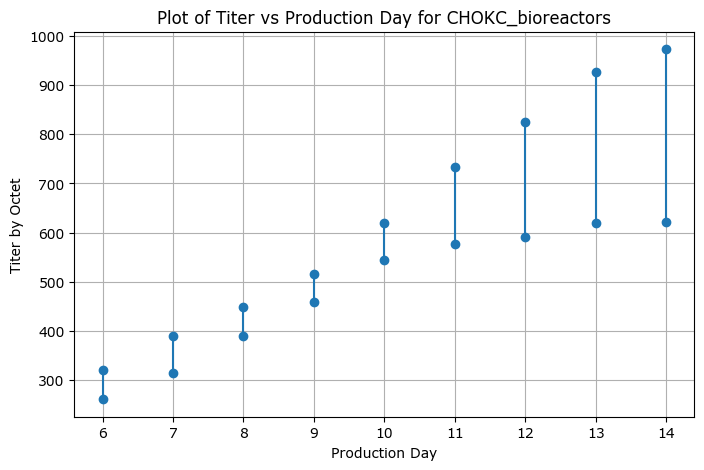

In [12]:
for name, df in dataframes_okc.items():
    if 'production_day' in df.columns and 'titer_octet_mgl' in df.columns:
        plot_dataframe_line(df, 'production_day', 'titer_octet_mgl', xlabel='Production Day', ylabel='Titer by Octet', title=f'Plot of Titer vs Production Day for {name}')

In [13]:
for names, data in dataframes.items():
    print(names)
    # break 

CHOS_april
CHOS_june
CHOS_may
CHOS_mock
CHOS_clone
CHOS_train_mock
CHOS_camp_1


In [14]:
import random 

sample_CHOS = random.sample(['CHOS_april', 'CHOS_june', 'CHOS_may', 'CHOS_mock', 'CHOS_clone', 'CHOS_train_mock', 'CHOS_camp_1'], 1)[0]
sample_CHOKC = random.sample(['CHOKC_clone', 'CHOKC_seed_feed', 'CHOKC_metalytics', 'CHOKC_bioreactors'],1)[0]


for names, data in dataframes_okc.items():
    if names == sample_CHOKC:
        print(data)
        break


     CO2_saturation_%   DO  Temp  air_saturation_%  ammonia_mM  avg_cell_diam_µM  bicarbonate_mM  calcium_mM  cell_viability  feed_added_%  glucose_g/L  glutamate_mM  glutamine_mM  lactate_ngl  osmolality     pH  potassium_mM  production_day  sodium_mM  titer_octet_mgl  viable_cell_density
0                 NaN  0.5    37               NaN        1.26               NaN             NaN        0.12            96.6          0.03         4.59          4.27          7.55         0.08       270.0  7.801          7.02               0       92.3              NaN               230000
1                 NaN  0.5    37               NaN        1.26               NaN             NaN        0.12           100.0          0.03         4.49          3.82          7.38         0.08       276.0  7.517          6.91               0       90.8              NaN               240000
2                 NaN  0.5    37               NaN        1.57               NaN             NaN        0.12            98.8   

In [15]:
# dataframes

> Kalman Filter Titer Imputation (CHOS Dataset)

In [16]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Function to impute missing values using iterative imputation with Random Forest
def impute_missing_values(df, batch_names = None):
    # Define the RandomForestRegressor for the IterativeImputer
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

    # Create an IterativeImputer instance with the RandomForestRegressor
    imputer = IterativeImputer(estimator=rf_regressor, max_iter=10, random_state=0)

    # Separate specific columns to handle them manually
    columns_to_handle = ['DO', 'CO2_saturation_%', 'air_saturation_%', 'osmolality', 'bicarbonate_mM']
    specific_columns = {}
    for col in columns_to_handle:
        if col in df.columns:
            specific_columns[col] = df[col]
            df = df.drop(columns=[col])

    # Impute missing values using the IterativeImputer
    imputed_data = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

    # Manually handle imputation for the specific columns
    if 'DO' in specific_columns:
        do_values = specific_columns['DO']
        do_mask = do_values.isna()
        do_values_imputed = do_values.copy()
        do_values_imputed[do_mask] = np.random.uniform(0.3, 0.8, size=do_mask.sum())
        df_imputed['DO'] = do_values_imputed

    if 'CO2_saturation_%' in specific_columns:
        co2_values = specific_columns['CO2_saturation_%']
        co2_mask = co2_values.isna()
        co2_values_imputed = co2_values.copy()
        co2_values_imputed[co2_mask] = np.random.uniform(3.7, 5.6, size=co2_mask.sum())
        df_imputed['CO2_saturation_%'] = co2_values_imputed

    if 'air_saturation_%' in specific_columns:
        air_values = specific_columns['air_saturation_%']
        air_mask = air_values.isna()
        air_values_imputed = air_values.copy()
        air_values_imputed[air_mask] = np.random.uniform(11.5, 83.8, size=air_mask.sum())
        df_imputed['air_saturation_%'] = air_values_imputed

    if 'osmolality' in specific_columns and batch_names in ['CHOKC_clone', 'CHOKC_seed_feed', 'CHOKC_metalytics', 'CHOKC_bioreactors']:
        air_values = specific_columns['osmolality']
        air_mask = air_values.isna()
        air_values_imputed = air_values.copy()
        air_values_imputed[air_mask] = np.random.uniform(270, 875, size=air_mask.sum())
        df_imputed['osmolality'] = air_values_imputed

    if 'bicarbonate_mM' in specific_columns and batch_names in ['CHOKC_clone', 'CHOKC_seed_feed', 'CHOKC_metalytics', 'CHOKC_bioreactors']:
        air_values = specific_columns['bicarbonate_mM']
        air_mask = air_values.isna()
        air_values_imputed = air_values.copy()
        air_values_imputed[air_mask] = np.random.uniform(0.7, 28.6, size=air_mask.sum())
        df_imputed['bicarbonate_mM'] = air_values_imputed
        
    # Ensure titer_octet_mgl is increasing over production_day
    titer_col = 'titer_octet_mgl'
    if titer_col in df_imputed.columns:
        titer_values = df_imputed[titer_col].values
        for i in range(1, len(titer_values)):
            if titer_values[i] < titer_values[i - 1]:
                titer_values[i] = titer_values[i - 1] + np.abs(np.random.normal(0.1, 0.05))  # Ensure a small positive increment
        df_imputed[titer_col] = titer_values
    else:
        print(f'Titer column "{titer_col}" not found in the DataFrame')

    return df_imputed

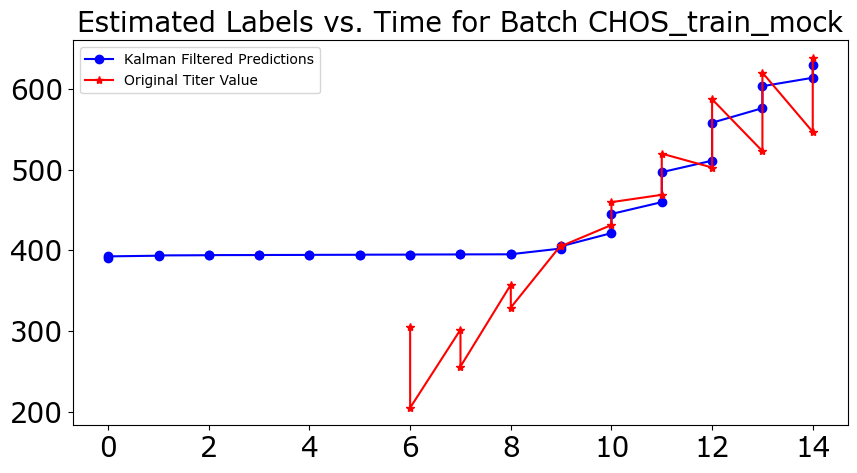

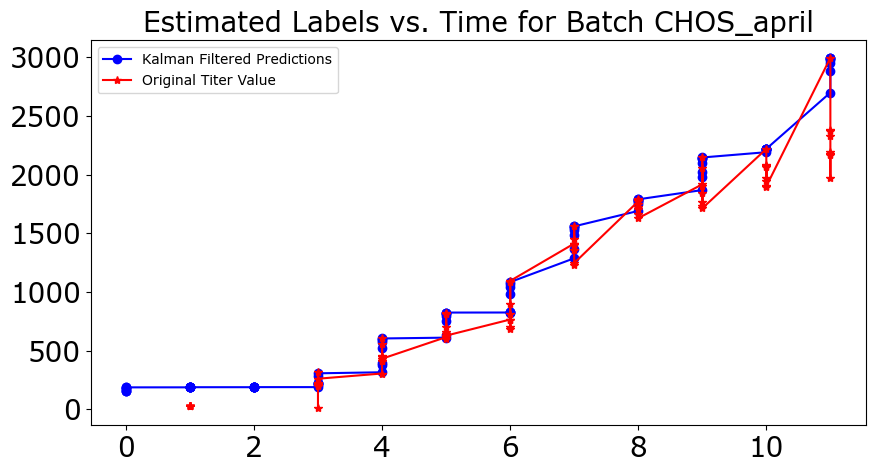

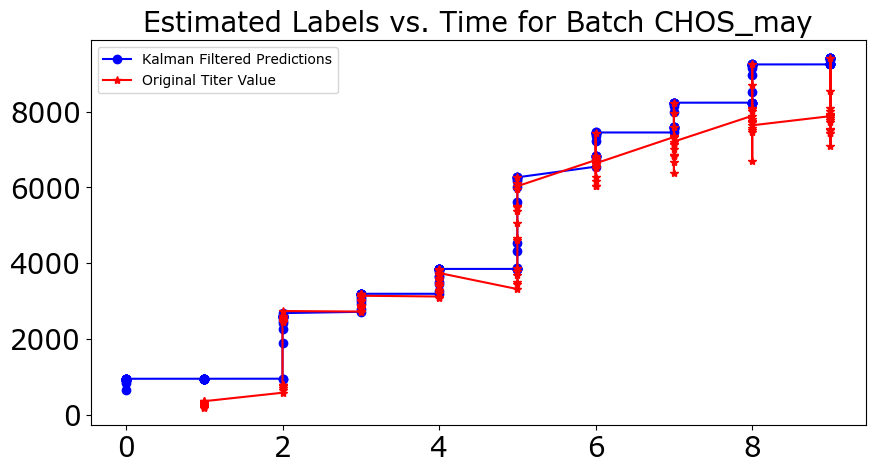

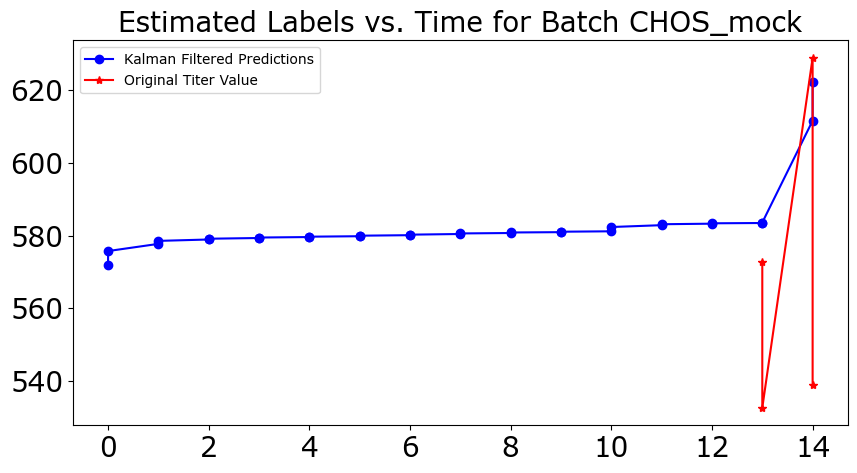

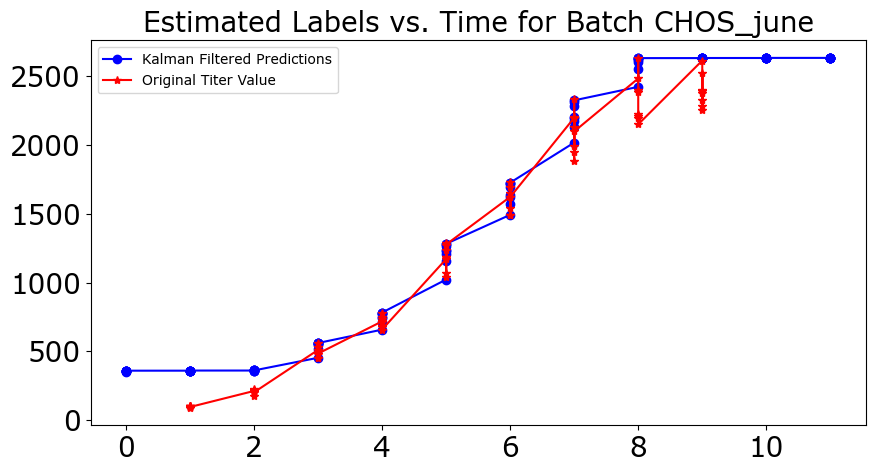

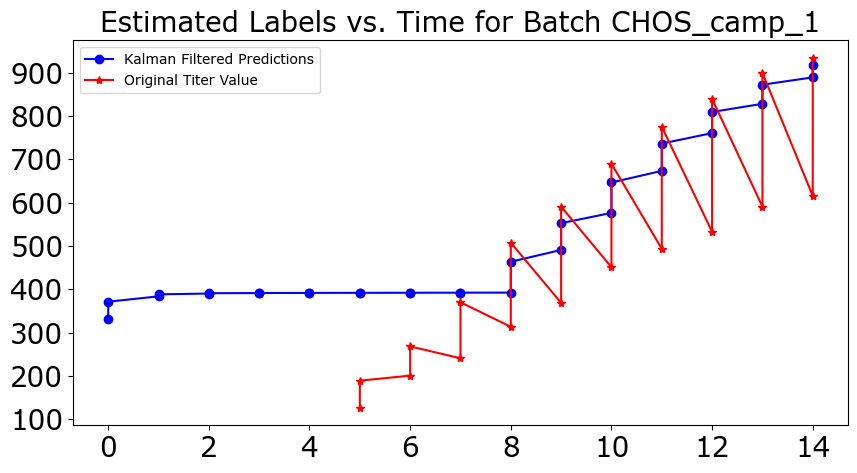

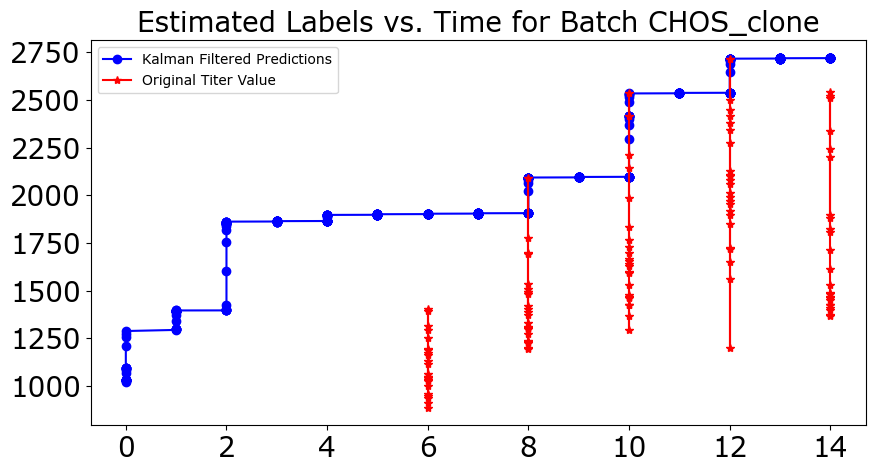

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from collections import namedtuple

# Define the State namedtuple
State = namedtuple('State', 'X, P')

# Predict step for Kalman filter
def predict(state, F, Q):
    x_pred = np.matmul(F, state.X)
    p_pred = np.matmul(F, np.matmul(state.P, F.T)) + Q
    return State(x_pred, p_pred)

# Update step for Kalman filter
def update(prior, z, R, H):
    z_pred = np.matmul(H, prior.X)
    y = z - z_pred
    S = np.matmul(H, np.matmul(prior.P, H.T)) + R
    K = np.matmul(prior.P, np.matmul(H.T, np.linalg.inv(S)))
    x_posterior = prior.X + np.matmul(K, y)
    p_posterior = np.matmul((np.identity(prior.P.shape[0]) - np.matmul(K, H)), prior.P)
    return State(x_posterior, p_posterior)


# Train and evaluate Kalman filter
def train_evaluate_kalman(dataframes):
    items = list(dataframes.items())
    random.shuffle(items)

    # Initial state vector and covariance
    x_initial = np.zeros((1, 1))
    P_initial = np.eye(1)

    # State transition matrix (F)
    F = np.eye(1)

    # Control input matrix (B)
    B = np.zeros((1, 3))  # Only 3 control variables

    # Measurement matrix (H)
    H = np.eye(1)

    # Process noise covariance (Q)
    Q = np.eye(1) * 0.01

    # Measurement noise covariance (R)
    R = np.eye(1) * 0.01

    kalman_results = []
    for batch_name, batch_data in items:
        labels = batch_data['titer_octet_mgl'].to_numpy()
        time_vector = batch_data['production_day'].to_numpy()

        # Impute missing values
        batch_data_imputed = impute_missing_values(batch_data)

        # Control input (u) using control variables from the dataset
        control_input = batch_data_imputed[["pH", "Temp", "DO"]].values.T
        filtered_state = []
        state = State(x_initial, P_initial)
        for i in range(len(batch_data_imputed)):
            z = np.array([[batch_data_imputed.iloc[i]['titer_octet_mgl']]])
            u = control_input[:, i].reshape(-1, 1)
            state = predict(state, F, Q)
            state = update(state, z, R, H)
            filtered_state.append(state.X.flatten()[0])

        # Create DataFrame for filtered results
        filtered_df = pd.DataFrame({
            'original_timepoint': time_vector,
            'original_titer': labels,
            'output_titre_µgl': filtered_state
        })
        kalman_results.append((filtered_df, batch_name))

    return kalman_results

kalman_results = train_evaluate_kalman(dataframes)

# Define the font size
font_size = 20

# Plotting each batch's estimated labels vs. time
for batch_data, batch in kalman_results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['original_timepoint'], batch_data['output_titre_µgl'], marker='o', linestyle='-', color='b', label='Kalman Filtered Predictions')
    plt.plot(batch_data['original_timepoint'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer Value')
    plt.title(f'Estimated Labels vs. Time for Batch {batch}', fontsize=font_size)
    # plt.xlabel('Production Days')
    # plt.ylabel('Output Titre by Octet (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend()  # This adds the legend to the plot
    plt.show()


In [107]:
# # Define Kalman filter function
# def kalman_filter(z, x, P, A, B, u, H, Q, R):
#     # Predict
#     x_pred = A @ x + B @ u
#     P_pred = A @ P @ A.T + Q

#     # Update
#     K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
#     x = x_pred + K @ (z - H @ x_pred)
#     P = (np.eye(1) - K @ H) @ P_pred

#     return x, P


# # Train and evaluate Kalman filter
# def train_evaluate_kalman(dataframes):
#     # Convert dictionary items to a list of (key, value) tuples
#     items = list(dataframes.items())
#     # Shuffle the list randomly
#     random.shuffle(items)

#     # Initial state vector (1 element: output_titre_µgl)
#     x = np.zeros((1, 1))

#     # State transition matrix (A)
#     A = np.eye(1)

#     # Control input matrix (B)
#     B = np.zeros((1, 3))  # Only 3 control variables

#     # Measurement matrix (H)
#     H = np.eye(1)

#     # Process noise covariance (Q)
#     Q = np.eye(1) * 0.01

#     # Measurement noise covariance (R)
#     R = np.eye(1) * 0.01

#     # Initial estimate covariance (P)
#     P = np.eye(1)

#     kalman_results = []
#     for batch_name, batch_data in items:
#         # Prepare features and labels
#         labels = batch_data['titer_octet_mgl'].to_numpy()
#         time_vector = batch_data['production_day'].to_numpy()

#         # Impute missing values
#         batch_data_imputed = impute_missing_values(batch_data, batch_name)

#         # Control input (u) using control variables from the dataset
#         control_input = batch_data_imputed[["pH", "Temp", "DO"]].values.T
#         filtered_state = []
#         for i in range(len(batch_data_imputed)):
#             z = np.array([[batch_data_imputed.iloc[i]['titer_octet_mgl']]])  # Only the "titer_octet_mgl" column
#             u = control_input[:, i].reshape(-1, 1)
#             x, P = kalman_filter(z, x, P, A, B, u, H, Q, R)
#             filtered_state.append(x.flatten()[0])  # Append the filtered "output_titre_µgl" value

#         # Create DataFrame for filtered results
#         filtered_df = pd.DataFrame({
#             'original_timepoint': time_vector,
#             'original_titer': labels,
#             'output_titre_µgl': filtered_state
#         })
#         kalman_results.append((filtered_df, batch_name))

#     return kalman_results

# kalman_results = train_evaluate_kalman(dataframes)

# # Plotting each batch's estimated labels vs. time
# for batch_data, batch in kalman_results:
#     plt.figure(figsize=(10, 5))
#     plt.plot(batch_data['original_timepoint'], batch_data['output_titre_µgl'], marker='o', linestyle='-', color='b', label='Kalman Filtered Predictions')
#     plt.plot(batch_data['original_timepoint'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer Value')
#     plt.title(f'Estimated Labels vs. Time for Batch {batch}')
#     plt.xlabel('Production Days')
#     plt.ylabel('Output Titre by Octet (mg/L)')
#     plt.grid(True)
#     plt.legend()  # This adds the legend to the plot
#     plt.show()


> Kalman Filter Titer Imputation (CHOKC Dataset)

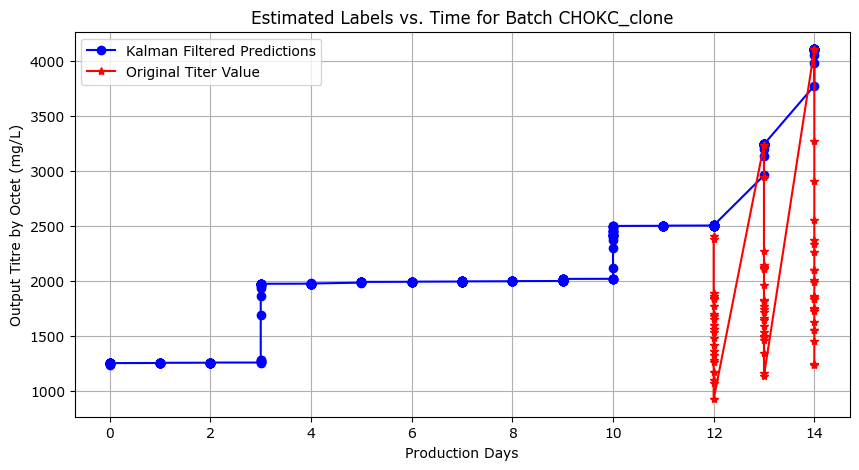

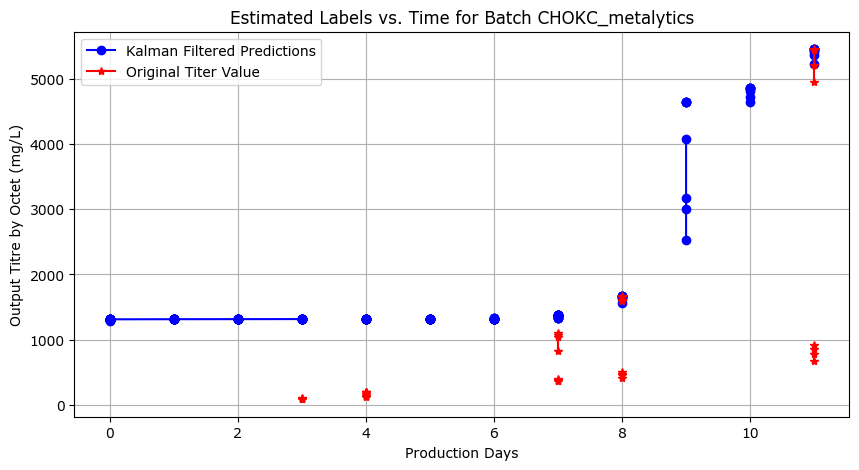

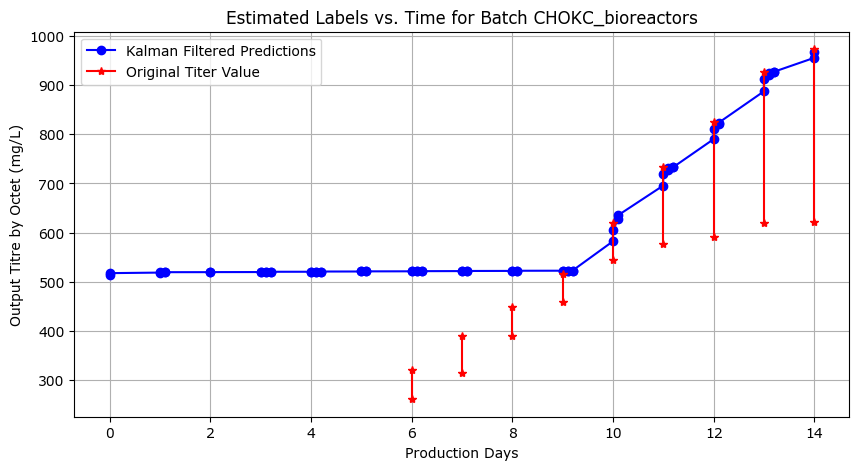

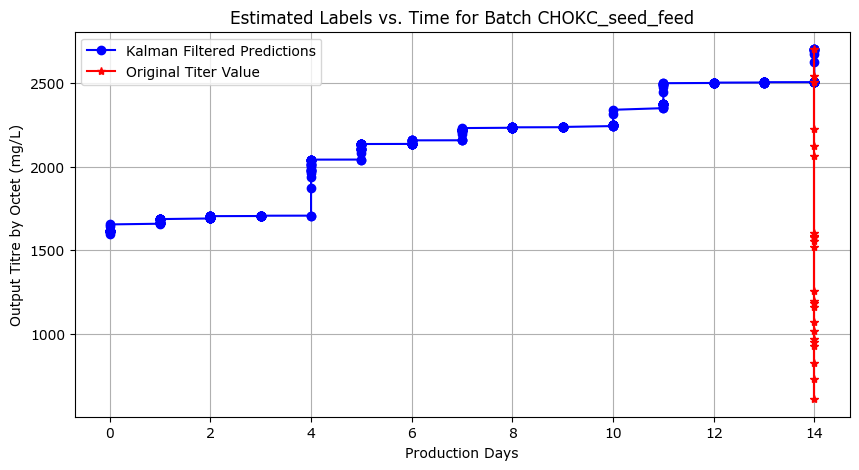

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from collections import namedtuple

# Define the State namedtuple
State = namedtuple('State', 'X, P')

# Predict step for Kalman filter
def predict(state, F, Q):
    x_pred = np.matmul(F, state.X)
    p_pred = np.matmul(F, np.matmul(state.P, F.T)) + Q
    return State(x_pred, p_pred)

# Update step for Kalman filter
def update(prior, z, R, H):
    z_pred = np.matmul(H, prior.X)
    y = z - z_pred
    S = np.matmul(H, np.matmul(prior.P, H.T)) + R
    K = np.matmul(prior.P, np.matmul(H.T, np.linalg.inv(S)))
    x_posterior = prior.X + np.matmul(K, y)
    p_posterior = np.matmul((np.identity(prior.P.shape[0]) - np.matmul(K, H)), prior.P)
    return State(x_posterior, p_posterior)


# Train and evaluate Kalman filter
def train_evaluate_kalman(dataframes_okc):
    items = list(dataframes_okc.items())
    random.shuffle(items)

    # Initial state vector and covariance
    x_initial = np.zeros((1, 1))
    P_initial = np.eye(1)

    # State transition matrix (F)
    F = np.eye(1)

    # Control input matrix (B)
    B = np.zeros((1, 3))  # Only 3 control variables

    # Measurement matrix (H)
    H = np.eye(1)

    # Process noise covariance (Q)
    Q = np.eye(1) * 0.01

    # Measurement noise covariance (R)
    R = np.eye(1) * 0.01

    kalman_results = []
    for batch_name, batch_data in items:
        labels = batch_data['titer_octet_mgl'].to_numpy()
        time_vector = batch_data['production_day'].to_numpy()

        # Impute missing values
        batch_data_imputed = impute_missing_values(batch_data, batch_name)

        # Control input (u) using control variables from the dataset
        control_input = batch_data_imputed[["pH", "Temp", "DO"]].values.T
        filtered_state = []
        state = State(x_initial, P_initial)
        for i in range(len(batch_data_imputed)):
            z = np.array([[batch_data_imputed.iloc[i]['titer_octet_mgl']]])
            u = control_input[:, i].reshape(-1, 1)
            state = predict(state, F, Q)
            state = update(state, z, R, H)
            filtered_state.append(state.X.flatten()[0])

        # Create DataFrame for filtered results
        filtered_df = pd.DataFrame({
            'original_timepoint': time_vector,
            'original_titer': labels,
            'output_titre_µgl': filtered_state
        })
        kalman_results.append((filtered_df, batch_name))

    return kalman_results

kalman_results = train_evaluate_kalman(dataframes_okc)

# Plotting each batch's estimated labels vs. time
for batch_data, batch in kalman_results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['original_timepoint'], batch_data['output_titre_µgl'], marker='o', linestyle='-', color='b', label='Kalman Filtered Predictions')
    plt.plot(batch_data['original_timepoint'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer Value')
    plt.title(f'Estimated Labels vs. Time for Batch {batch}', fontsize=font_size)
    # plt.xlabel('Production Days')
    # plt.ylabel('Output Titre by Octet (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend()  # This adds the legend to the plot
    plt.show()


In [56]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import random
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor


# # Train and evaluate Kalman filter
# def train_evaluate_kalman(dataframes_okc):
#     # Convert dictionary items to a list of (key, value) tuples
#     items = list(dataframes_okc.items())
#     # Shuffle the list randomly
#     random.shuffle(items)

#     # Initial state vector (1 element: output_titre_µgl)
#     x = np.zeros((1, 1))

#     # State transition matrix (A)
#     A = np.eye(1)

#     # Control input matrix (B)
#     B = np.zeros((1, 3))  # Only 3 control variables

#     # Measurement matrix (H)
#     H = np.eye(1)

#     # Process noise covariance (Q)
#     Q = np.eye(1) * 0.01

#     # Measurement noise covariance (R)
#     R = np.eye(1) * 0.01

#     # Initial estimate covariance (P)
#     P = np.eye(1) 

#     kalman_results = []
#     for batch_name, batch_data in items:
#         # Prepare features and labels
#         labels = batch_data['titer_octet_mgl'].to_numpy()
#         time_vector = batch_data['production_day'].to_numpy()
#         print(batch_name)
#         # Impute missing values
#         batch_data_imputed = impute_missing_values(batch_data, batch_name)

#         # Control input (u) using control variables from the dataset
#         control_input = batch_data_imputed[["pH", "Temp", "DO"]].values.T
#         filtered_state = []
#         for i in range(len(batch_data_imputed)):
#             z = np.array([[batch_data_imputed.iloc[i]['titer_octet_mgl']]])  # Only the "titer_octet_mgl" column
#             u = control_input[:, i].reshape(-1, 1)
#             x, P = kalman_filter(z, x, P, A, B, u, H, Q, R)
#             filtered_state.append(x.flatten()[0])  # Append the filtered "output_titre_µgl" value

#         # Create DataFrame for filtered results
#         filtered_df = pd.DataFrame({
#             'original_timepoint': time_vector,
#             'original_titer': labels,
#             'output_titre_µgl': filtered_state
#         })
#         kalman_results.append((filtered_df, batch_name))

#     return kalman_results

# kalman_results = train_evaluate_kalman(dataframes_okc)

# # Plotting each batch's estimated labels vs. time
# for batch_data, batch in kalman_results:
#     plt.figure(figsize=(10, 5))
#     plt.plot(batch_data['original_timepoint'], batch_data['output_titre_µgl'], marker='o', linestyle='-', color='b', label='Kalman Filtered Predictions')
#     plt.plot(batch_data['original_timepoint'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer Value')
#     plt.title(f'Estimated Labels vs. Time for Batch {batch}')
#     plt.xlabel('Production Days')
#     plt.ylabel('Output Titre by Octet (mg/L)')
#     plt.grid(True)
#     plt.legend()  # This adds the legend to the plot
#     plt.show()


### Wiener Filter

> Wiener Filter for CHOS dataset

Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter


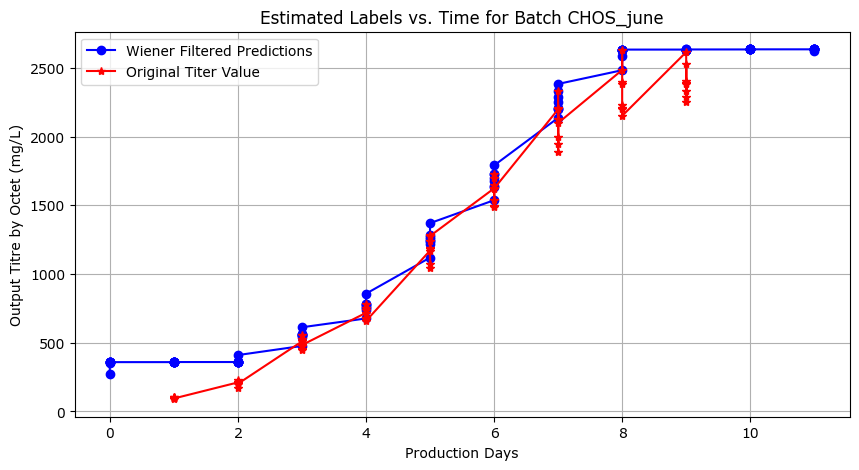

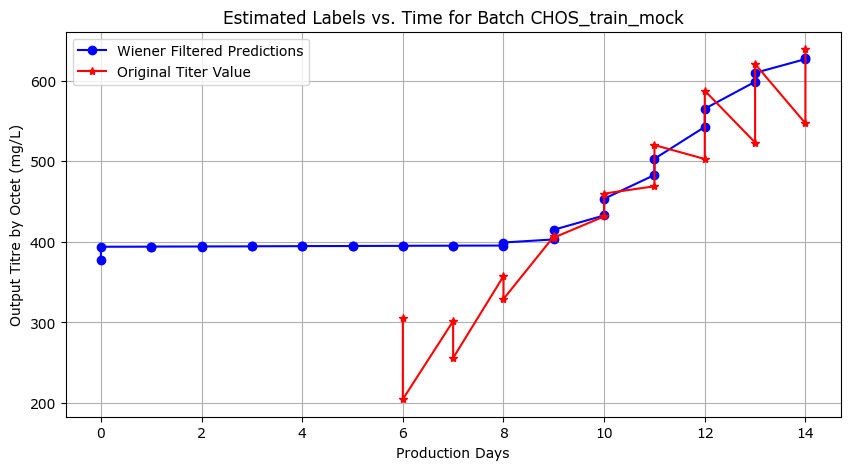

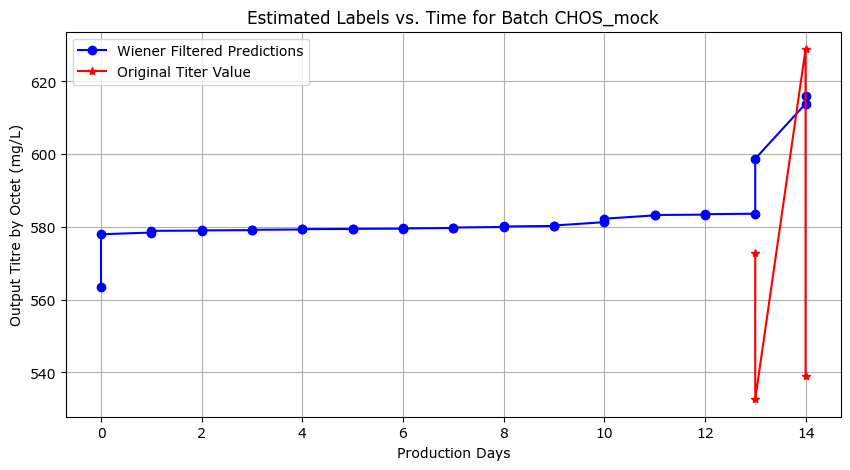

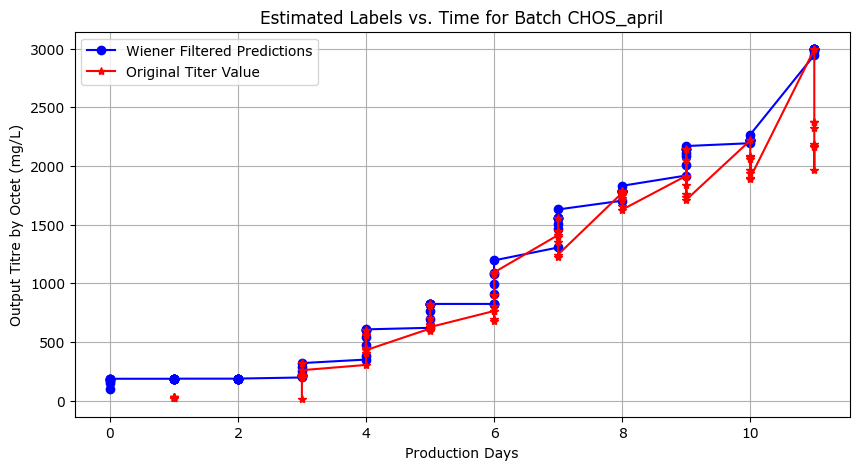

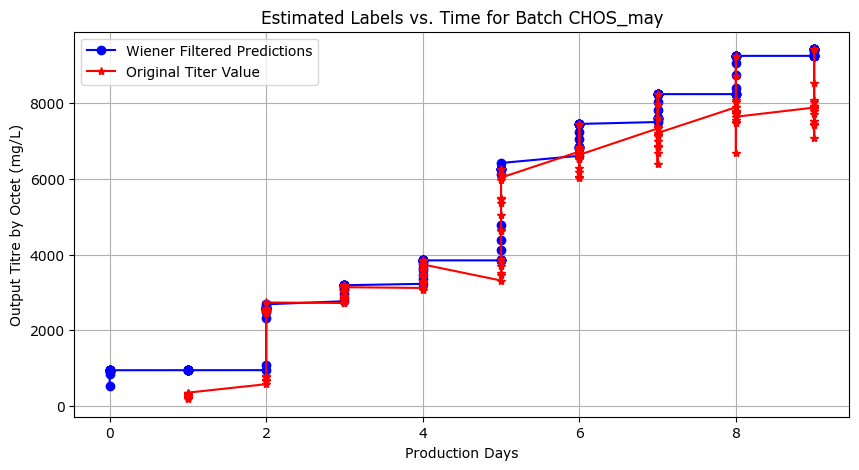

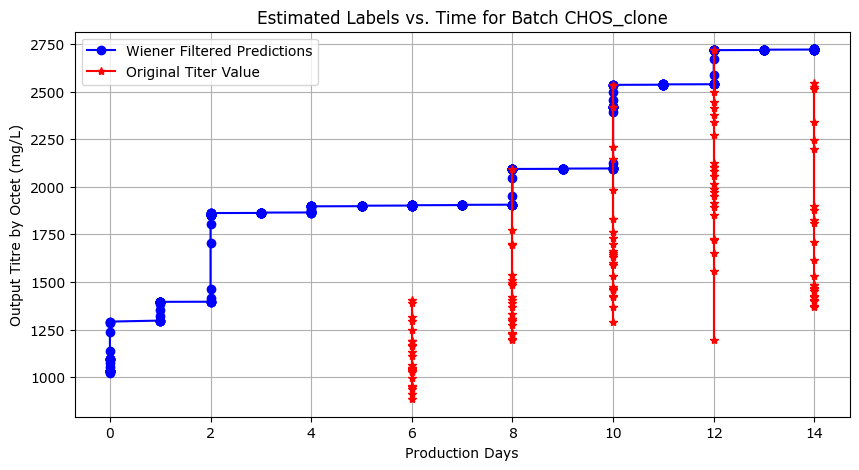

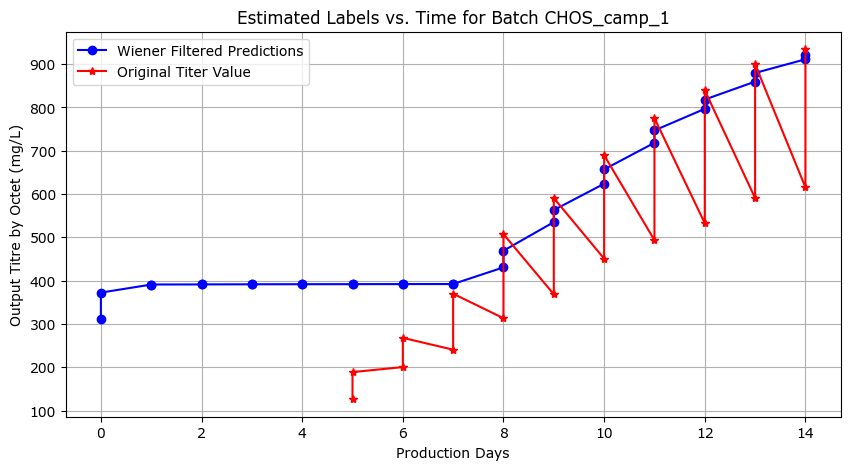

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from scipy.signal import wiener

# Wiener filter implementation
def wiener_filter(data, mysize=None, noise=None):
    # print("Applying Wiener filter")
    filtered_data = wiener(data, mysize=mysize, noise=noise)
    return filtered_data

# Train and evaluate Wiener filter
def train_evaluate_wiener(dataframes):
    items = list(dataframes.items())
    random.shuffle(items)

    wiener_results = []
    for batch_name, batch_data in items:
        labels = batch_data['titer_octet_mgl'].to_numpy()
        time_vector = batch_data['production_day'].to_numpy()

        # Impute missing values
        batch_data_imputed = impute_missing_values(batch_data)

        # Apply Wiener filter on the titer values
        titer_values = batch_data_imputed['titer_octet_mgl'].to_numpy()
        filtered_titer = wiener_filter(titer_values)

        # Create DataFrame for filtered results
        filtered_df = pd.DataFrame({
            'original_timepoint': time_vector,
            'original_titer': labels,
            'output_titre_µgl': filtered_titer
        })
        wiener_results.append((filtered_df, batch_name))

    return wiener_results

wiener_results = train_evaluate_wiener(dataframes)

# Plotting each batch's estimated labels vs. time
for batch_data, batch in wiener_results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['original_timepoint'], batch_data['output_titre_µgl'], marker='o', linestyle='-', color='b', label='Wiener Filtered Predictions')
    plt.plot(batch_data['original_timepoint'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer Value')
    plt.title(f'Estimated Labels vs. Time for Batch {batch}')
    plt.xlabel('Production Days')
    plt.ylabel('Output Titre by Octet (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend()  # This adds the legend to the plot
    plt.show()


> Wiener Filter for CHOKC dataset

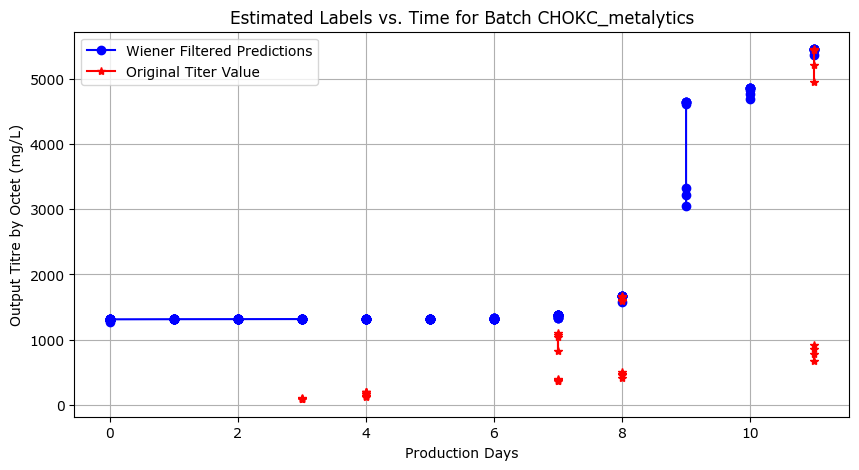

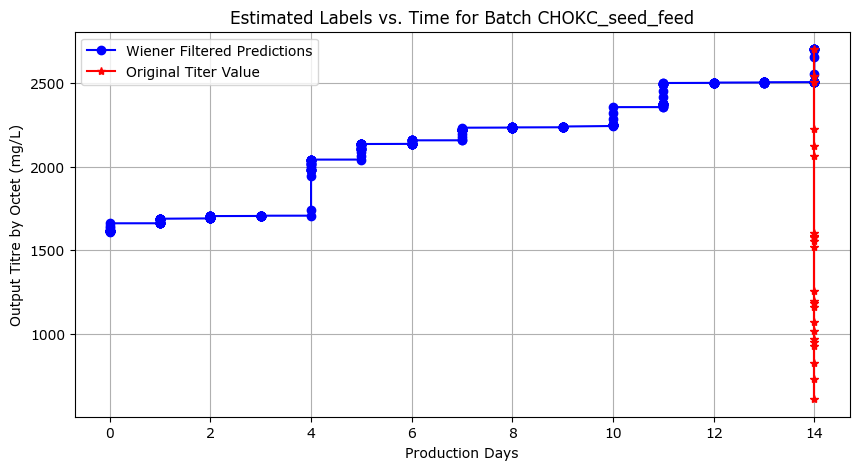

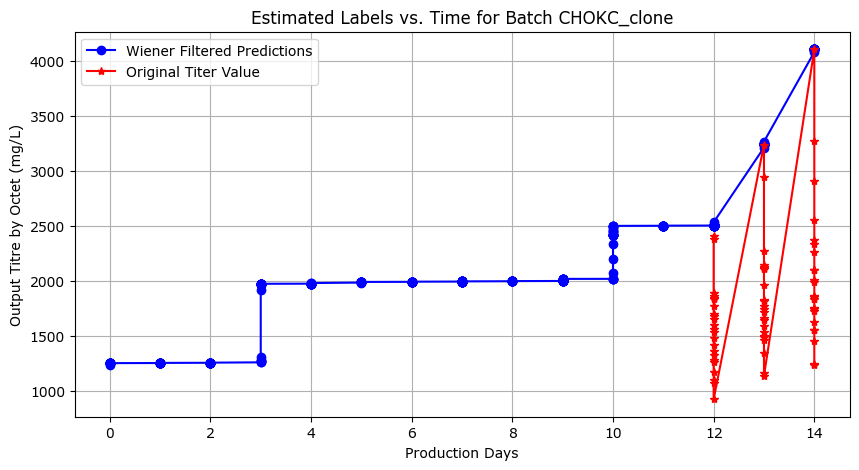

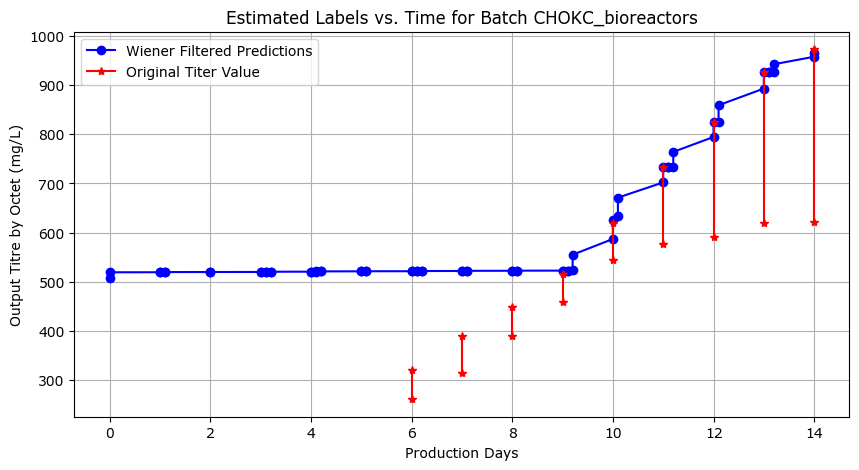

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from scipy.signal import wiener

# Wiener filter implementation
def wiener_filter(data, mysize=None, noise=None):
    # print("Applying Wiener filter")
    filtered_data = wiener(data, mysize=mysize, noise=noise)
    return filtered_data

# Train and evaluate Wiener filter
def train_evaluate_wiener(dataframes):
    items = list(dataframes.items())
    random.shuffle(items)

    wiener_results = []
    for batch_name, batch_data in items:
        labels = batch_data['titer_octet_mgl'].to_numpy()
        time_vector = batch_data['production_day'].to_numpy()

        # Impute missing values
        batch_data_imputed = impute_missing_values(batch_data, batch_name) 

        # Apply Wiener filter on the titer values
        titer_values = batch_data_imputed['titer_octet_mgl'].to_numpy()
        filtered_titer = wiener_filter(titer_values)

        # Create DataFrame for filtered results
        filtered_df = pd.DataFrame({
            'original_timepoint': time_vector,
            'original_titer': labels,
            'output_titre_µgl': filtered_titer
        })
        wiener_results.append((filtered_df, batch_name))

    return wiener_results

wiener_results = train_evaluate_wiener(dataframes_okc)

# Plotting each batch's estimated labels vs. time
for batch_data, batch in wiener_results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['original_timepoint'], batch_data['output_titre_µgl'], marker='o', linestyle='-', color='b', label='Wiener Filtered Predictions')
    plt.plot(batch_data['original_timepoint'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer Value')
    plt.title(f'Estimated Labels vs. Time for Batch {batch}')
    plt.xlabel('Production Days')
    plt.ylabel('Output Titre by Octet (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend()  # This adds the legend to the plot
    plt.show()


> Kalman Filter for Imputation and then Wiener Filter for Filtering

In [18]:
import numpy as np
from collections import namedtuple

State = namedtuple('State', 'X, P')

class KalmanFilter:
    def __init__(self, F, Q, H, R, x0, P0):
        self.F = F
        self.Q = Q
        self.H = H
        self.R = R
        self.state = State(x0, P0)

    def predict(self):
        x_pred = np.dot(self.F, self.state.X)
        P_pred = np.dot(np.dot(self.F, self.state.P), self.F.T) + self.Q
        self.state = State(x_pred, P_pred)

    def update(self, z):
        S = np.dot(np.dot(self.H, self.state.P), self.H.T) + self.R
        K = np.dot(np.dot(self.state.P, self.H.T), np.linalg.inv(S))
        y = z - np.dot(self.H, self.state.X)
        x_post = self.state.X + np.dot(K, y)
        P_post = np.dot((np.eye(self.state.P.shape[0]) - np.dot(K, self.H)), self.state.P)
        self.state = State(x_post, P_post)
        return self.state.X

    def step(self, z):
        self.predict()
        return self.update(z)



from scipy.signal import wiener

def apply_wiener_filter(data):
    print("Applying Wiener filter")
    filtered_data = wiener(data, mysize=None, noise=None)
    return filtered_data

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [30]:
def impute_and_filter(dataframes):
    results = []

    # Define Kalman filter parameters
    F = np.eye(1)  # State transition matrix
    Q = np.eye(1) * 0.01  # Process noise covariance
    H = np.eye(1)  # Measurement matrix
    R = np.eye(1) * 0.01  # Measurement noise covariance
    x0 = np.zeros((1, 1))  # Initial state
    P0 = np.eye(1)  # Initial covariance

    for batch_name, batch_data in dataframes.items():
        time_vector = batch_data['production_day'].to_numpy()
        titer_values = batch_data['titer_octet_mgl'].to_numpy()

        # Create a mask for missing values
        missing_mask = np.isnan(titer_values)

        # Initialize Kalman filter
        kalman_filter = KalmanFilter(F, Q, H, R, x0, P0)

        # Impute missing values using Kalman filter
        imputed_titer = titer_values.copy()
        for i in range(len(titer_values)):
            if missing_mask[i]:
                # Predict step
                imputed_titer[i] = kalman_filter.state.X.flatten()[0]
            else:
                # Update step
                kalman_filter.step(np.array([[titer_values[i]]]))

        # Apply Wiener filter to smooth the imputed data
        filtered_titer = apply_wiener_filter(imputed_titer)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(titer_values[~missing_mask], filtered_titer[~missing_mask]))
        mae = mean_absolute_error(titer_values[~missing_mask], filtered_titer[~missing_mask])
        mape = mean_absolute_percentage_error(titer_values[~missing_mask], filtered_titer[~missing_mask])


        # Store the results
        filtered_df = pd.DataFrame({
            'production_day': time_vector,
            'original_titer': titer_values,
            'imputed_titer': imputed_titer,
            'filtered_titer': filtered_titer
        })
        results.append((filtered_df, batch_name, rmse, mae, mape))

    return results


In [111]:
os.getcwd()

'C:\\Users\\pault\\OneDrive - University of Oklahoma\\GRA - Bio-Manufacturing\\1. ML-Cytovance-OU-Research\\titer\\jackson Data'

Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Batch CHOS_april - RMSE: 79.47, MAE: 64.43, MAPE: 14.75%
Batch CHOS_june - RMSE: 76.07, MAE: 57.41, MAPE: 6.66%
Batch CHOS_may - RMSE: 203.40, MAE: 159.01, MAPE: 5.07%
Batch CHOS_mock - RMSE: 40.66, MAE: 36.00, MAPE: 6.23%
Batch CHOS_clone - RMSE: 64.48, MAE: 53.03, MAPE: 3.48%
Batch CHOS_train_mock - RMSE: 39.53, MAE: 34.57, MAPE: 9.28%
Batch CHOS_camp_1 - RMSE: 99.27, MAE: 89.27, MAPE: 18.52%


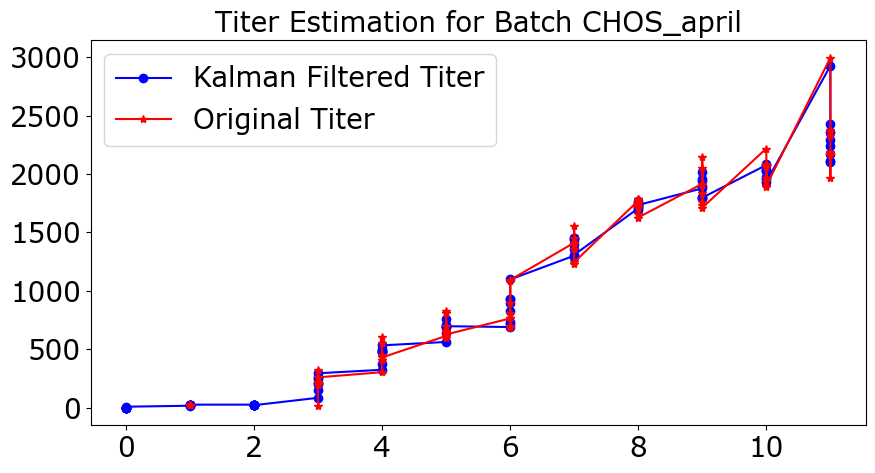

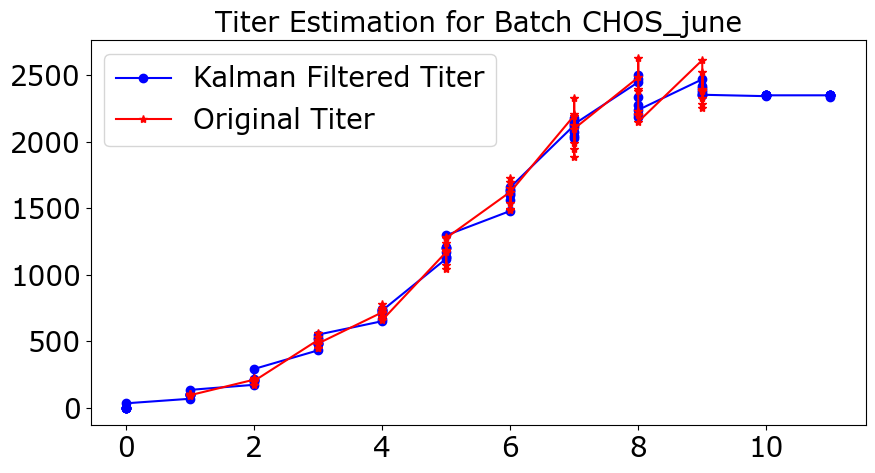

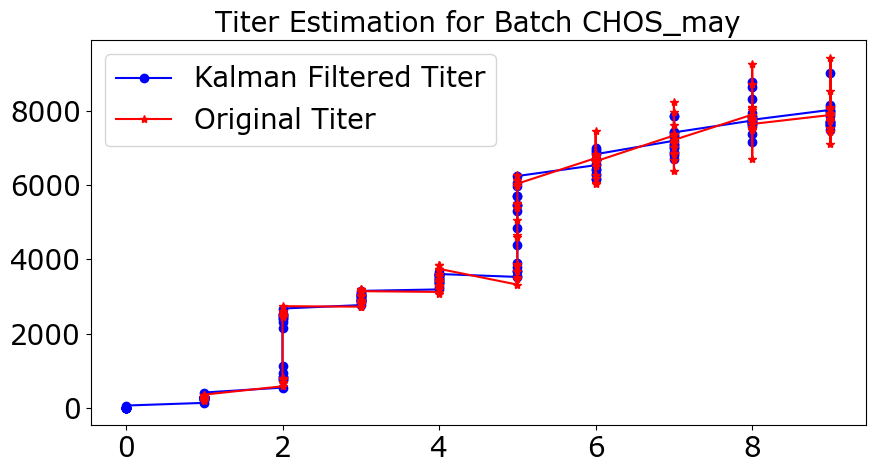

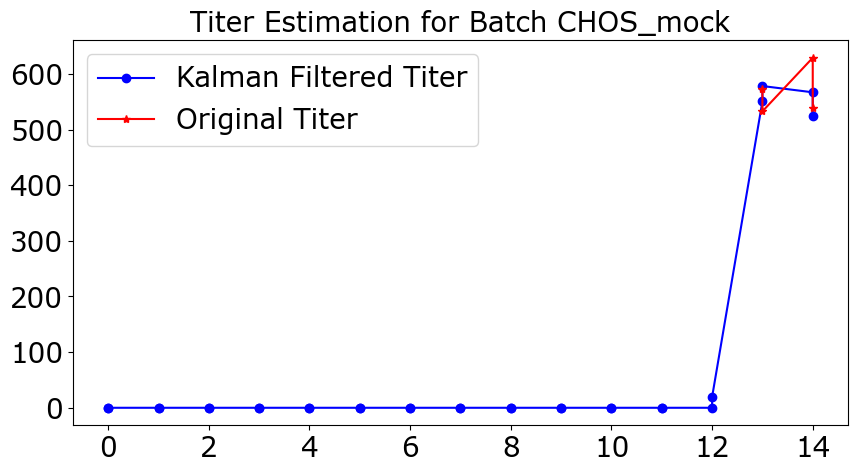

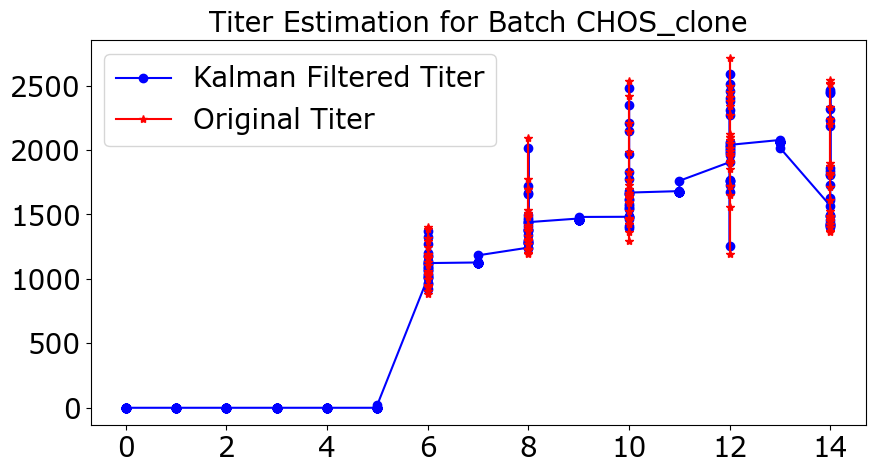

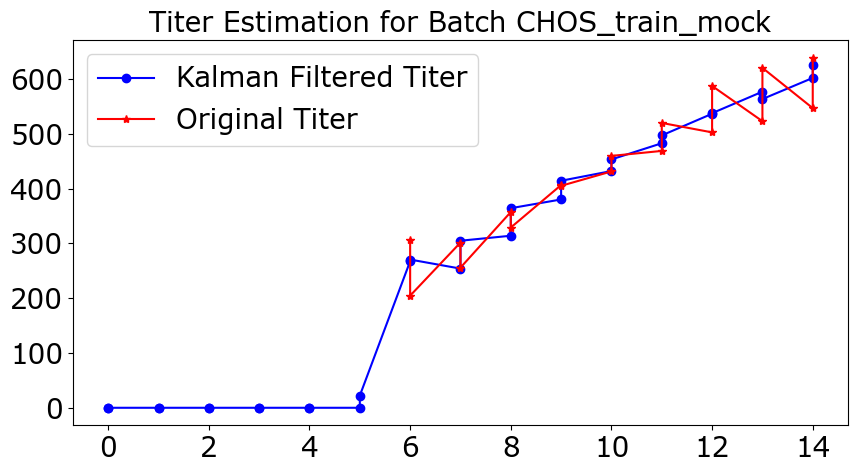

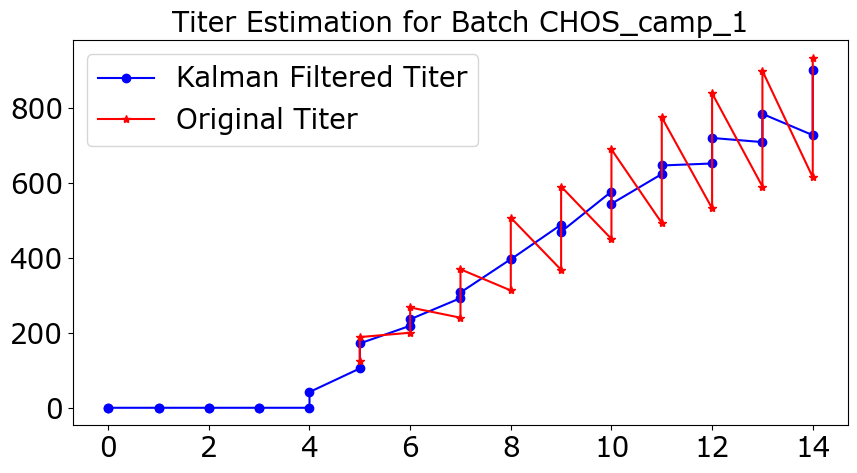

In [33]:


results = impute_and_filter(dataframes)

# Example results output
for batch_data, batch_name, rmse, mae, mape in results:
    print(f'Batch {batch_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')
    
    
file_url = r'C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research\titer\Results\Kalman\Jackson'
# Plotting results
for batch_data, batch_name, rmse, mae, mape in results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['production_day'], batch_data['filtered_titer'], marker='o', linestyle='-', color='b', label='Kalman Filtered Titer')
    plt.plot(batch_data['production_day'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer')
    plt.title(f'Titer Estimation for Batch {batch_name}', fontsize=font_size)
    # plt.xlabel('Production Days')
    # plt.ylabel('Titer (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size)
    plt.savefig(f'{file_url}\{batch_name}.png') 
    plt.show()



Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter


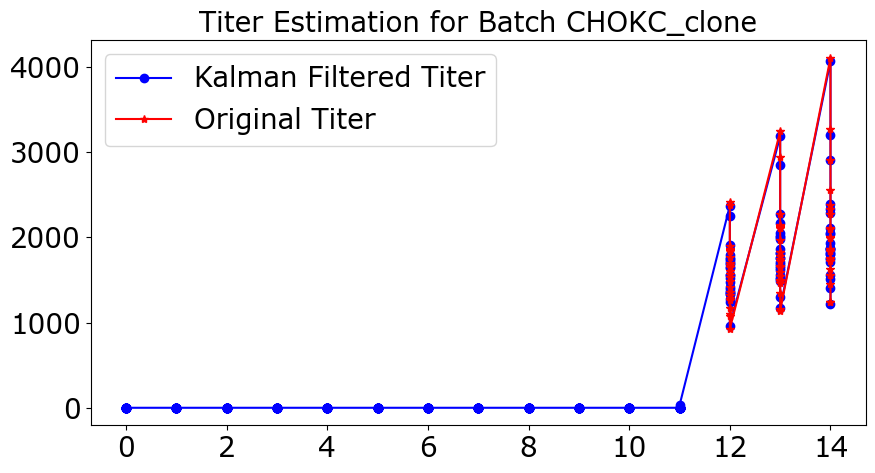

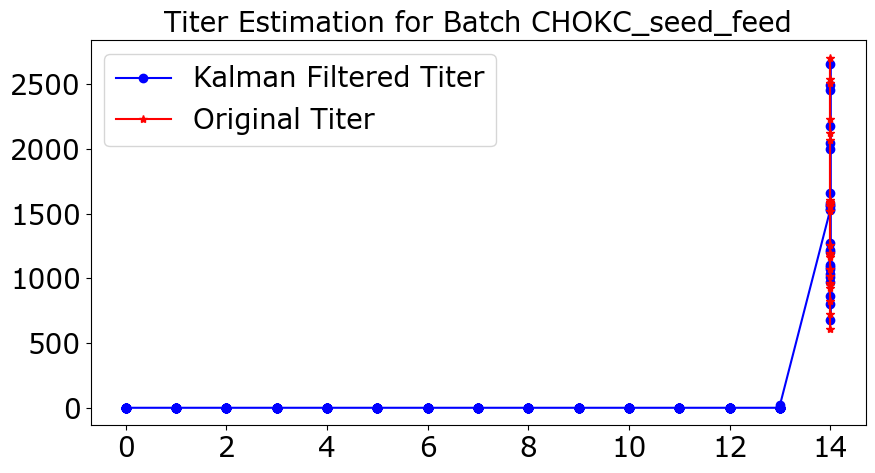

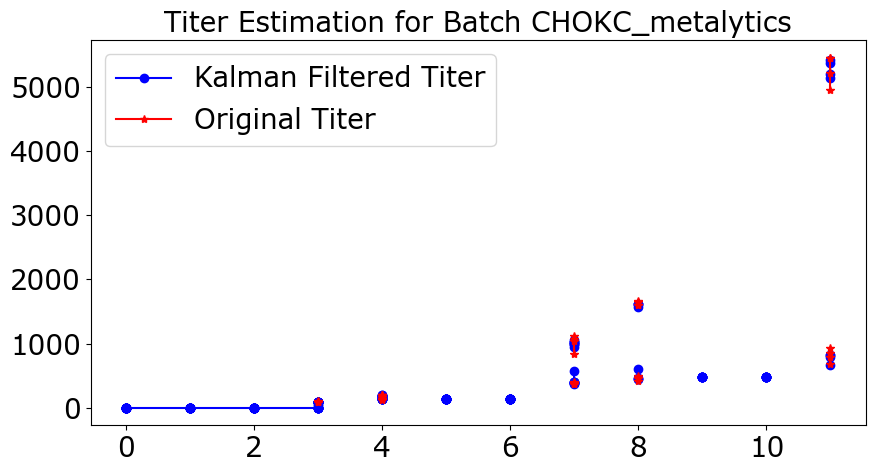

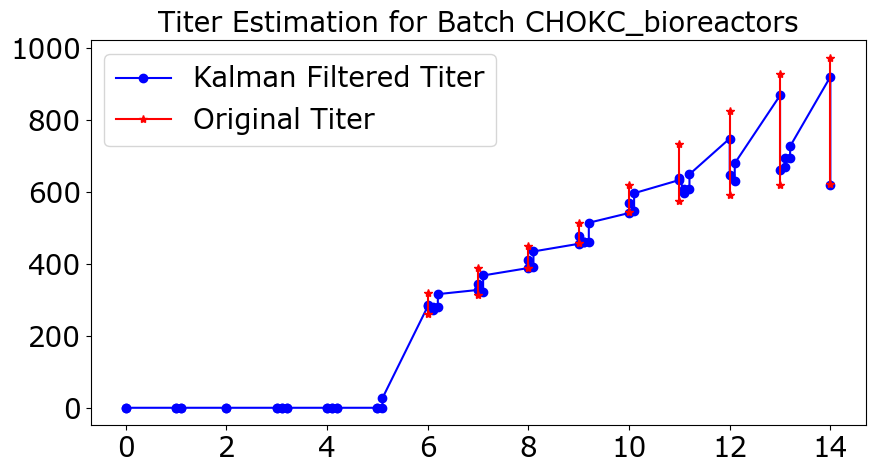

In [24]:

results = impute_and_filter(dataframes_okc)
file_url = r'C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research\titer\Results\Kalman\Jackson'

# Plotting results
for batch_data, batch_name in results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['production_day'], batch_data['filtered_titer'], marker='o', linestyle='-', color='b', label='Kalman Filtered Titer')
    plt.plot(batch_data['production_day'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer')
    plt.title(f'Titer Estimation for Batch {batch_name}', fontsize=font_size)
    # plt.xlabel('Production Days')
    # plt.ylabel('Titer (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size)
    plt.savefig(f'{file_url}\{batch_name}.png')
    plt.show()


> Applying Particle Filters for Imputation and then Wiener filters for Filtering

Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter


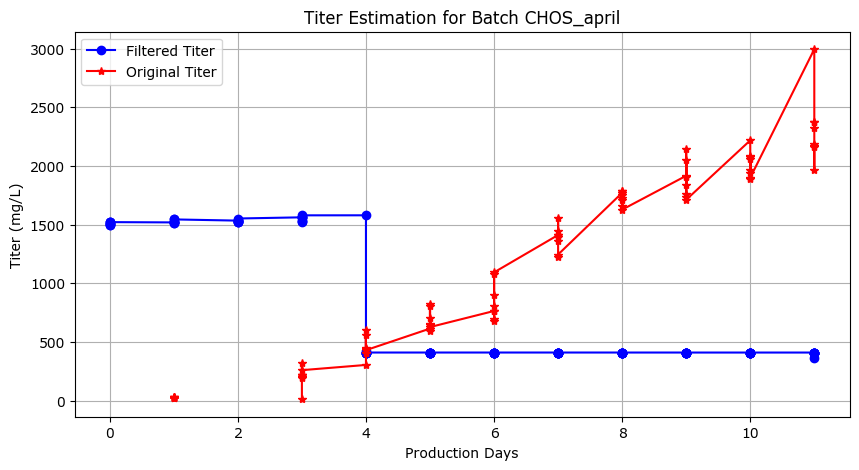

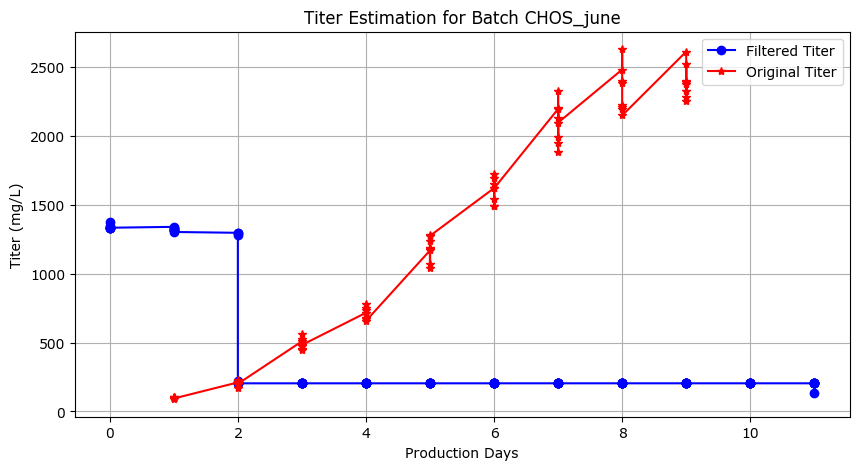

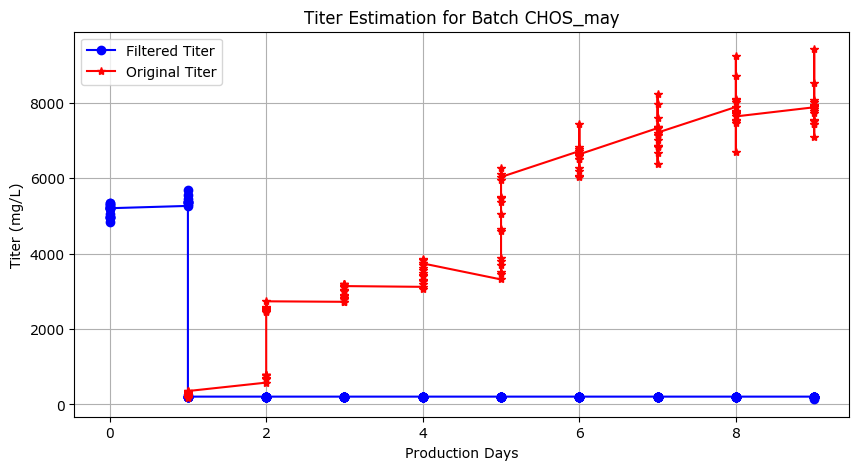

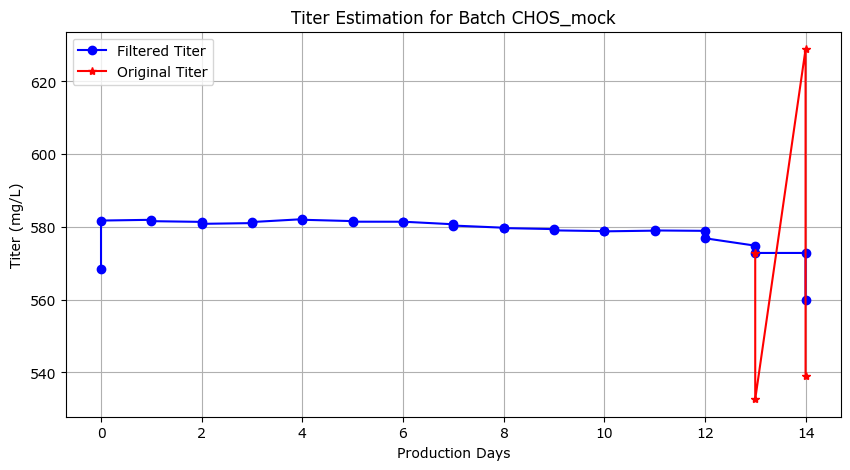

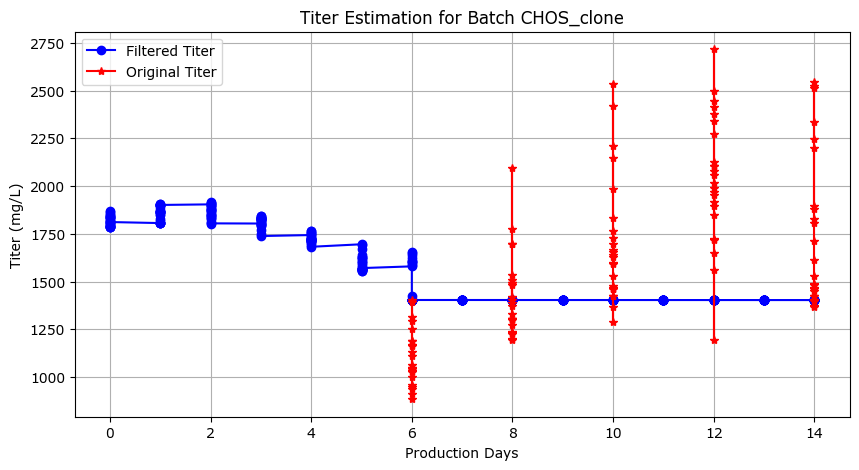

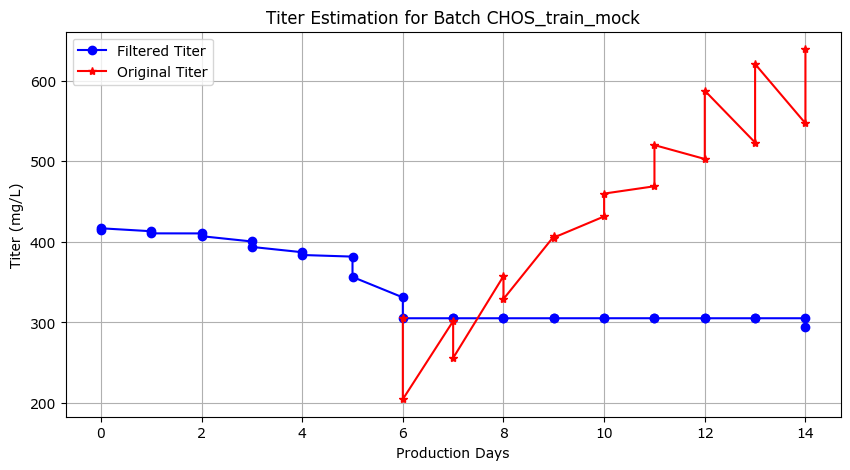

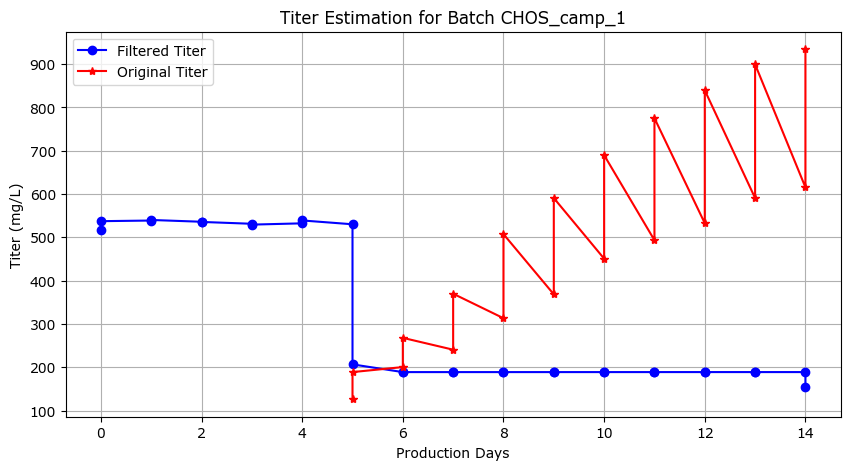

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Particle Filter functions
def create_particles(num_particles, feature_ranges):
    particles = np.empty((num_particles, len(feature_ranges)))
    for i, (low, high) in enumerate(feature_ranges):
        if high - low == 0:
            particles[:, i] = low
        else:
            particles[:, i] = np.random.uniform(low, high, size=num_particles)
    return particles

def predict(particles, std_dev):
    return particles + np.random.normal(0, std_dev, particles.shape)

def update(particles, weights, observed_value, measurement_std):
    if np.isnan(observed_value):
        return weights
    errors = observed_value - particles[:, 0]
    weights *= np.exp(-0.5 * (errors ** 2) / (measurement_std ** 2))
    weights += 1.e-300  # avoid round-off to zero
    weights /= np.sum(weights)
    return weights

def resample(particles, weights):
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1.0  # ensure sum is exactly one
    indexes = np.searchsorted(cumulative_sum, np.random.uniform(0, 1, len(weights)))
    particles[:] = particles[indexes]
    weights.fill(1.0 / len(weights))
    return particles, weights

def estimate(particles, weights):
    return np.average(particles[:, 0], weights=weights)

# Apply Wiener filter
def apply_wiener_filter(data):
    print("Applying Wiener filter")
    filtered_data = wiener(data, mysize=None, noise=None)
    return filtered_data

# Particle filter class
class ParticleFilter:
    def __init__(self, num_particles, std_dev, measurement_std, feature_ranges):
        self.num_particles = num_particles
        self.std_dev = std_dev
        self.measurement_std = measurement_std
        self.particles = create_particles(num_particles, feature_ranges)
        self.weights = np.ones(num_particles) / num_particles

    def predict(self):
        self.particles = predict(self.particles, self.std_dev)

    def update(self, observed_value):
        self.weights = update(self.particles, self.weights, observed_value, self.measurement_std)
        self.particles, self.weights = resample(self.particles, self.weights)
        return estimate(self.particles, self.weights)

# Main function to impute and filter data
def impute_and_filter(dataframes):
    results = []

    # Define Particle filter parameters
    num_particles = 1000
    std_dev = 0.1
    measurement_std = 0.01

    for batch_name, batch_data in dataframes.items():
        time_vector = batch_data['production_day'].to_numpy()
        titer_values = batch_data['titer_octet_mgl'].to_numpy()

        # Create a mask for missing values
        missing_mask = np.isnan(titer_values)

        # Feature ranges for Particle Filter
        feature_ranges = [(batch_data['titer_octet_mgl'].min(), batch_data['titer_octet_mgl'].max())]

        # Initialize Particle filter
        particle_filter = ParticleFilter(num_particles, std_dev, measurement_std, feature_ranges)

        # Impute missing values using Particle filter
        imputed_titer = titer_values.copy()
        for i in range(len(titer_values)):
            if missing_mask[i]:
                particle_filter.predict()
                imputed_titer[i] = particle_filter.update(np.nan)
            else:
                particle_filter.predict()
                imputed_titer[i] = particle_filter.update(titer_values[i])

        # Apply Wiener filter to smooth the imputed data
        filtered_titer = apply_wiener_filter(imputed_titer)

        # Store the results
        filtered_df = pd.DataFrame({
            'production_day': time_vector,
            'original_titer': titer_values,
            'imputed_titer': imputed_titer,
            'filtered_titer': filtered_titer
        })
        results.append((filtered_df, batch_name))

    return results

# Example usage
# Assuming 'dataframes' is a dictionary loaded with the necessary data
results = impute_and_filter(dataframes)

# Plotting results
for batch_data, batch_name in results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['production_day'], batch_data['filtered_titer'], marker='o', linestyle='-', color='b', label='Filtered Titer')
    plt.plot(batch_data['production_day'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer')
    plt.title(f'Titer Estimation for Batch {batch_name}', fontsize=font_size)
    plt.xlabel('Production Days')
    plt.ylabel('Titer (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend()
    plt.show()


Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter


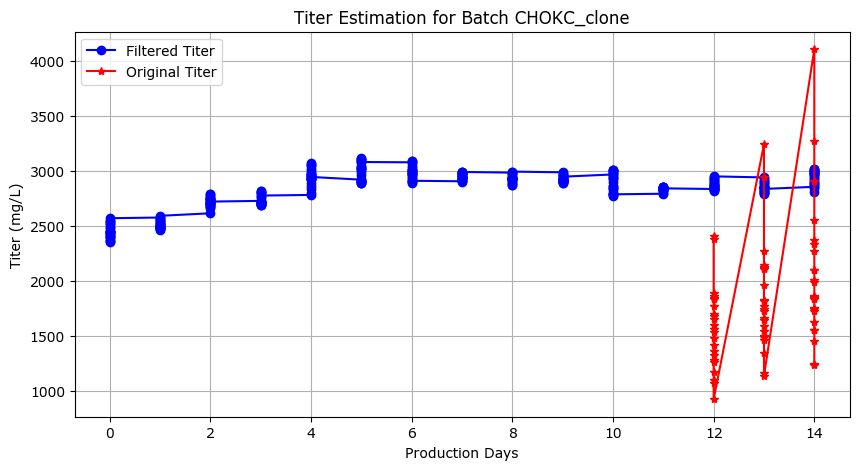

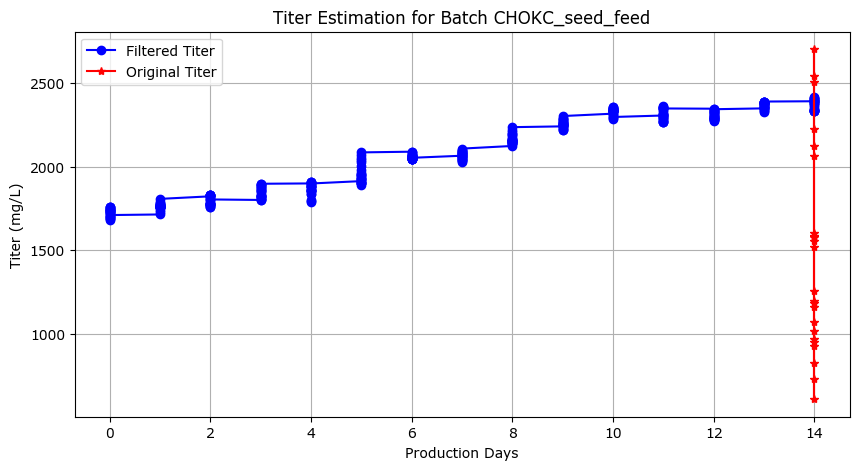

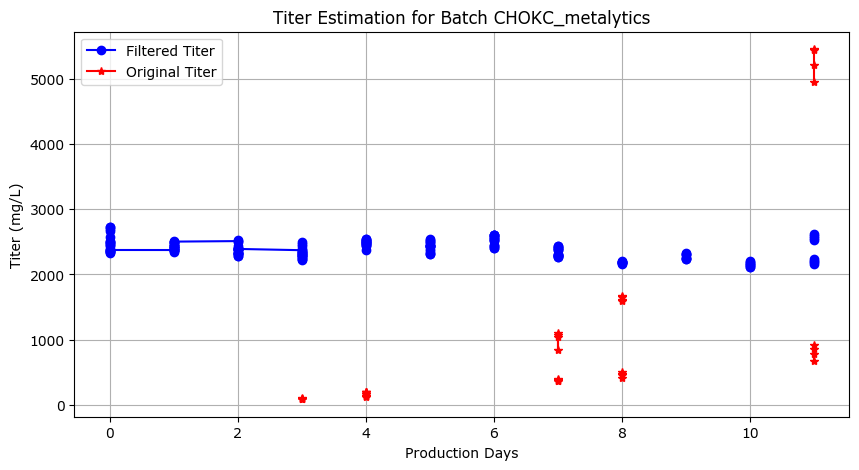

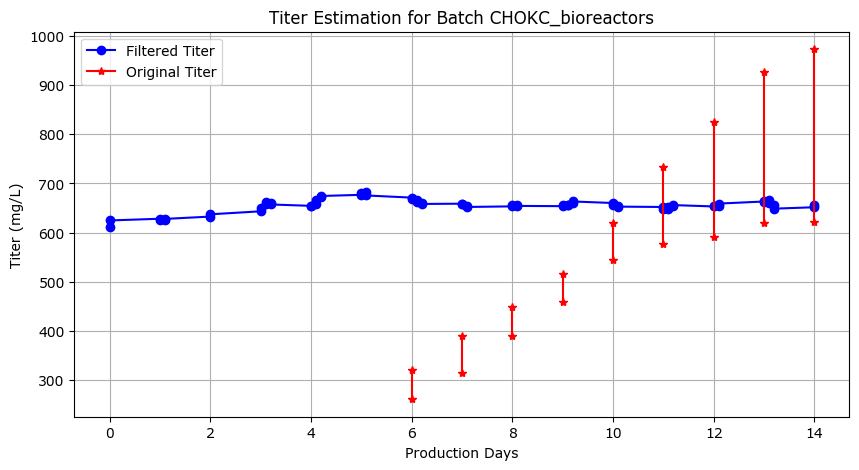

In [71]:

results = impute_and_filter(dataframes_okc)

# Plotting results
for batch_data, batch_name in results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['production_day'], batch_data['filtered_titer'], marker='o', linestyle='-', color='b', label='Filtered Titer')
    plt.plot(batch_data['production_day'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer')
    plt.title(f'Titer Estimation for Batch {batch_name}', fontsize=font_size)
    plt.xlabel('Production Days')
    plt.ylabel('Titer (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend()
    plt.show()


Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter


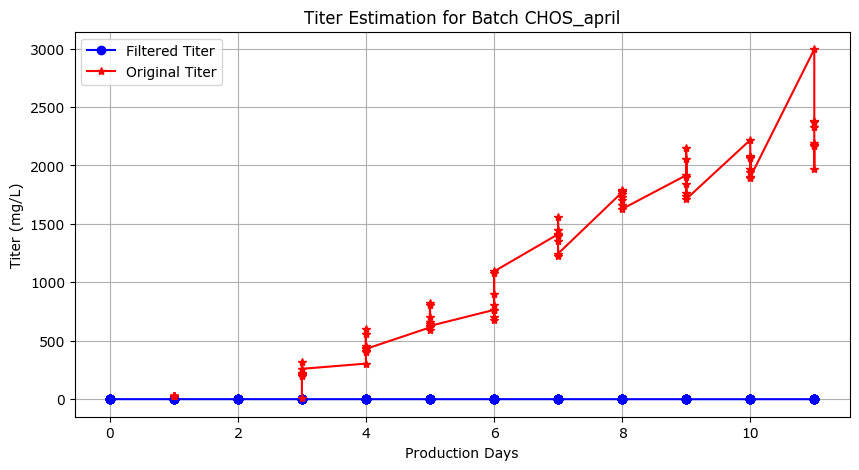

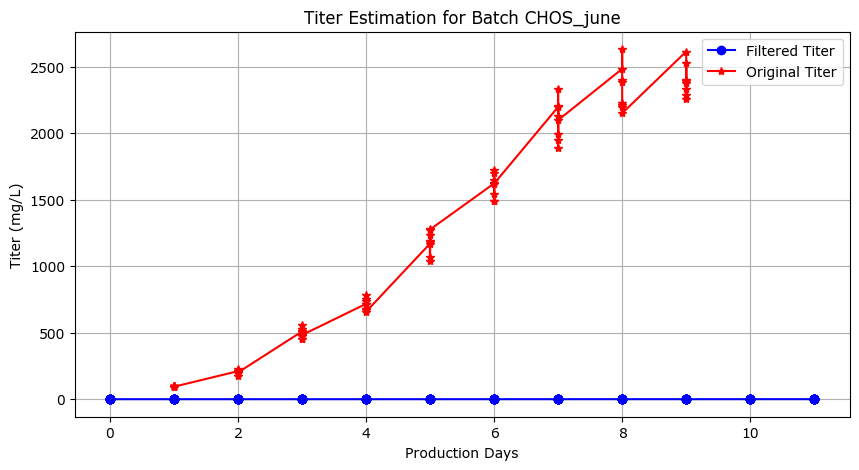

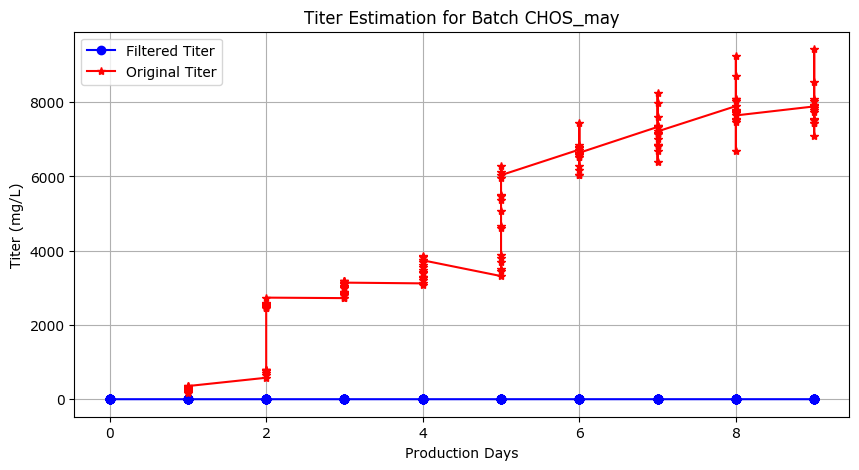

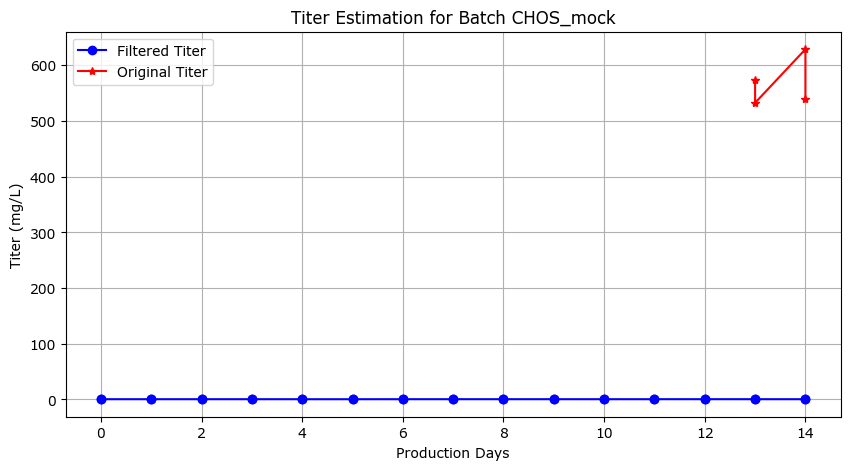

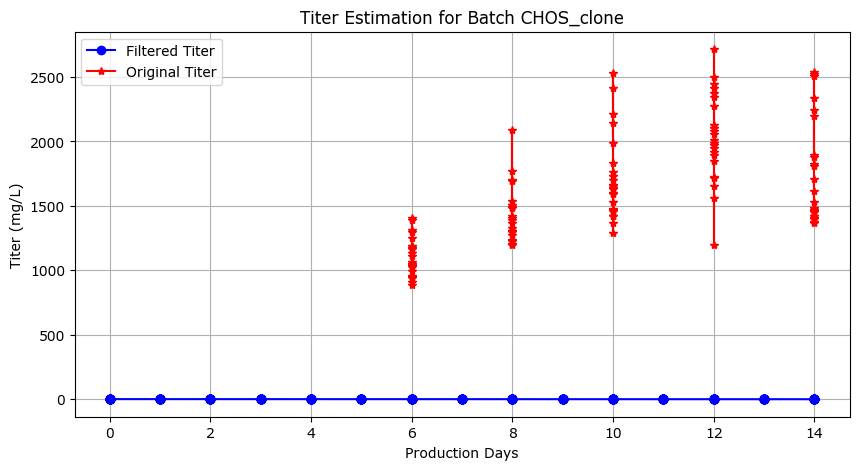

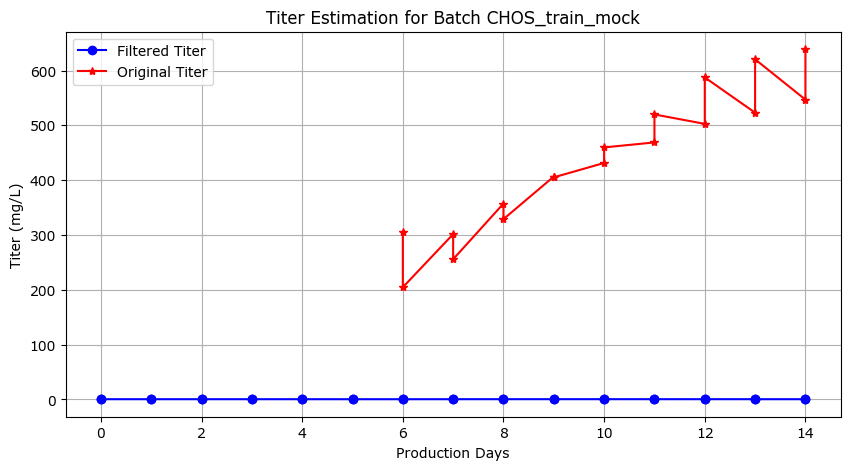

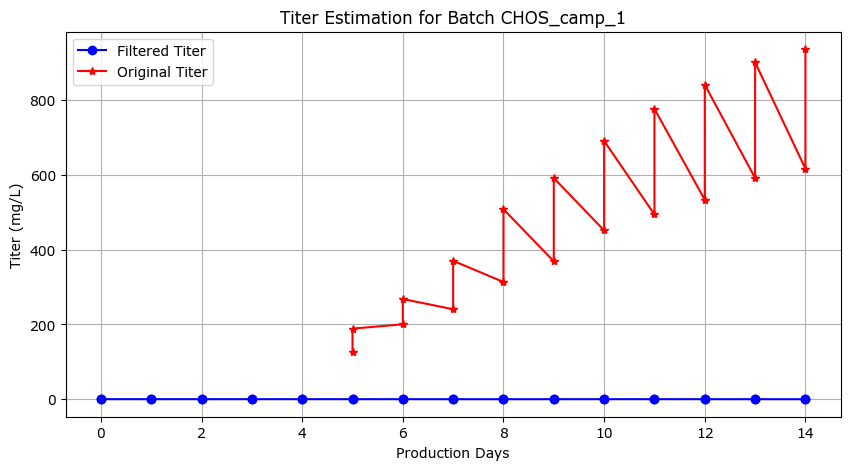

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener
from sklearn.preprocessing import MinMaxScaler

# Particle Filter functions
def create_particles(num_particles, feature_ranges):
    particles = np.empty((num_particles, len(feature_ranges)))
    for i, (low, high) in enumerate(feature_ranges):
        if high - low == 0:
            particles[:, i] = low
        else:
            particles[:, i] = np.random.uniform(low, high, size=num_particles)
    return particles

def predict(particles, std_dev):
    return particles + np.random.normal(0, std_dev, particles.shape)

def update(particles, weights, observed_value, measurement_std):
    if np.isnan(observed_value):
        return weights
    errors = observed_value - particles[:, -1]
    weights *= np.exp(-0.5 * (errors ** 2) / (measurement_std ** 2))
    weights += 1.e-300  # avoid round-off to zero
    weights /= np.sum(weights)
    return weights

def resample(particles, weights):
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1.0  # ensure sum is exactly one
    indexes = np.searchsorted(cumulative_sum, np.random.uniform(0, 1, len(weights)))
    particles[:] = particles[indexes]
    weights.fill(1.0 / len(weights))
    return particles, weights

def estimate(particles, weights):
    return np.average(particles[:, -1], weights=weights)

# Apply Wiener filter
def apply_wiener_filter(data):
    print("Applying Wiener filter")
    filtered_data = wiener(data, mysize=None, noise=None)
    return filtered_data

# Particle filter class
class ParticleFilter:
    def __init__(self, num_particles, std_dev, measurement_std, feature_ranges):
        self.num_particles = num_particles
        self.std_dev = std_dev
        self.measurement_std = measurement_std
        self.particles = create_particles(num_particles, feature_ranges)
        self.weights = np.ones(num_particles) / num_particles

    def predict(self):
        self.particles = predict(self.particles, self.std_dev)

    def update(self, observed_value):
        self.weights = update(self.particles, self.weights, observed_value, self.measurement_std)
        self.particles, self.weights = resample(self.particles, self.weights)
        return estimate(self.particles, self.weights)

# Main function to impute and filter data
def impute_and_filter(dataframes):
    results = []

    # Define Particle filter parameters
    num_particles = 1000
    std_dev = 0.1
    measurement_std = 0.01

    # Normalizing feature ranges
    all_features = pd.concat(dataframes.values())
    scaler = MinMaxScaler()
    scaler.fit(all_features)

    for batch_name, batch_data in dataframes.items():
        time_vector = batch_data['production_day'].to_numpy()
        titer_values = batch_data['titer_octet_mgl'].to_numpy()

        # Create a mask for missing values
        missing_mask = np.isnan(titer_values)

        # Normalize batch_data
        batch_data_normalized = scaler.transform(batch_data)

        # Feature ranges for Particle Filter
        feature_ranges = [(0, 1)] * batch_data_normalized.shape[1]  # All features are now in the range [0, 1]

        # Initialize Particle filter
        particle_filter = ParticleFilter(num_particles, std_dev, measurement_std, feature_ranges)

        # Impute missing values using Particle filter
        imputed_titer = titer_values.copy()
        for i in range(len(titer_values)):
            if missing_mask[i]:
                particle_filter.predict()
                imputed_titer[i] = particle_filter.update(np.nan)
            else:
                particle_filter.predict()
                imputed_titer[i] = particle_filter.update(titer_values[i])

        # Apply Wiener filter to smooth the imputed data
        filtered_titer = apply_wiener_filter(imputed_titer)

        # Store the results
        filtered_df = pd.DataFrame({
            'production_day': time_vector,
            'original_titer': titer_values,
            'imputed_titer': imputed_titer,
            'filtered_titer': filtered_titer
        })
        results.append((filtered_df, batch_name))

    return results

# Example usage
# Assuming 'dataframes' is a dictionary loaded with the necessary data
results = impute_and_filter(dataframes)

# Plotting results
for batch_data, batch_name in results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['production_day'], batch_data['filtered_titer'], marker='o', linestyle='-', color='b', label='Filtered Titer')
    plt.plot(batch_data['production_day'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer')
    plt.title(f'Titer Estimation for Batch {batch_name}')
    plt.xlabel('Production Days')
    plt.ylabel('Titer (mg/L)')
    plt.grid(True)
    plt.legend()
    plt.show()


> Bilateral Filter for Imputation

Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Batch CHOS_april - RMSE: 79.42, MAE: 64.27, MAPE: 13.92%
Batch CHOS_june - RMSE: 75.72, MAE: 56.72, MAPE: 6.20%
Batch CHOS_may - RMSE: 203.29, MAE: 158.45, MAPE: 4.83%
Batch CHOS_mock - RMSE: 39.35, MAE: 32.71, MAPE: 5.65%
Batch CHOS_clone - RMSE: 61.68, MAE: 49.74, MAPE: 3.27%
Batch CHOS_train_mock - RMSE: 39.28, MAE: 34.25, MAPE: 9.19%
Batch CHOS_camp_1 - RMSE: 98.47, MAE: 88.58, MAPE: 18.40%


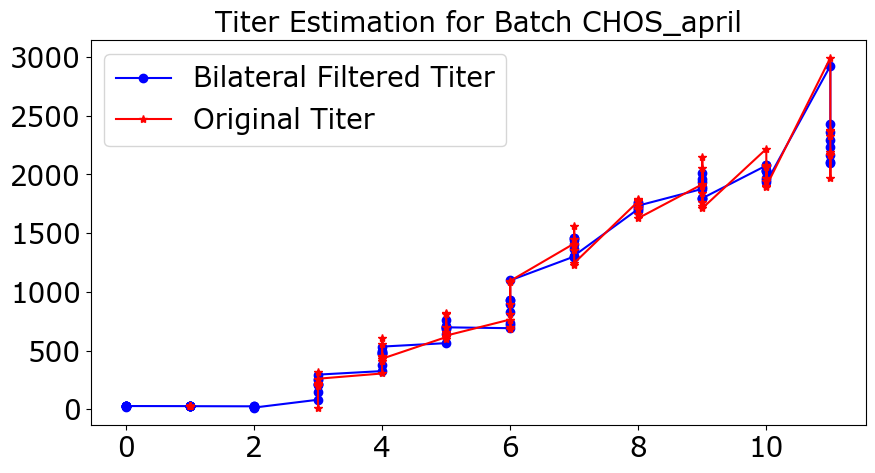

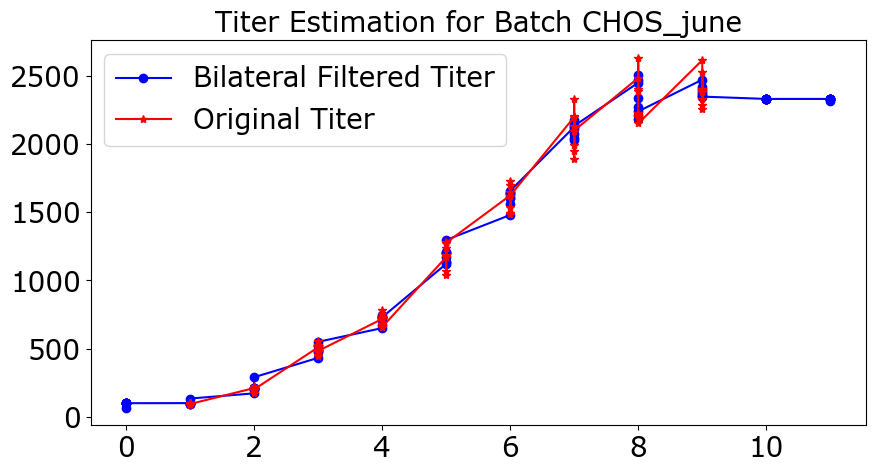

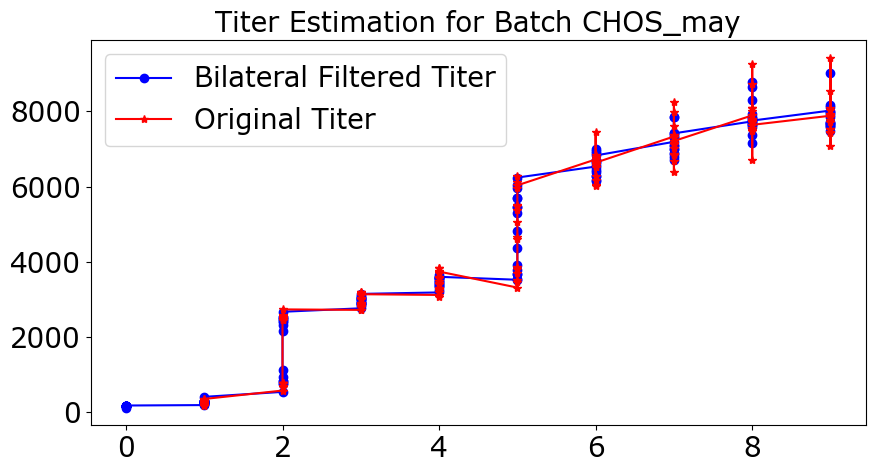

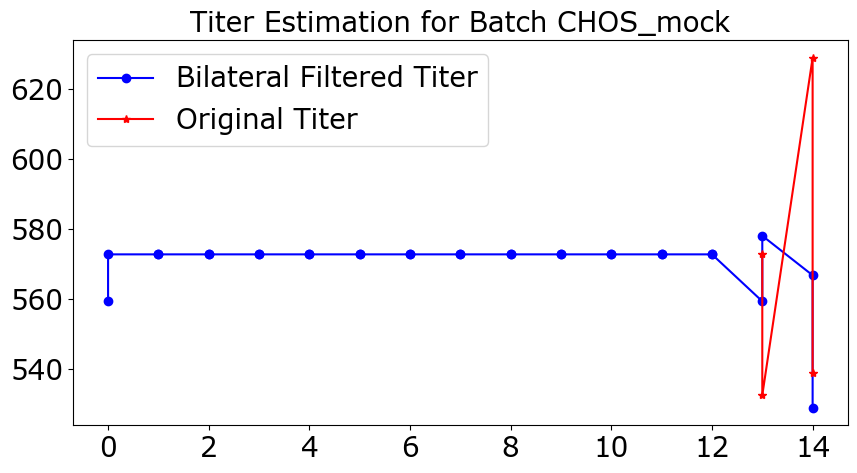

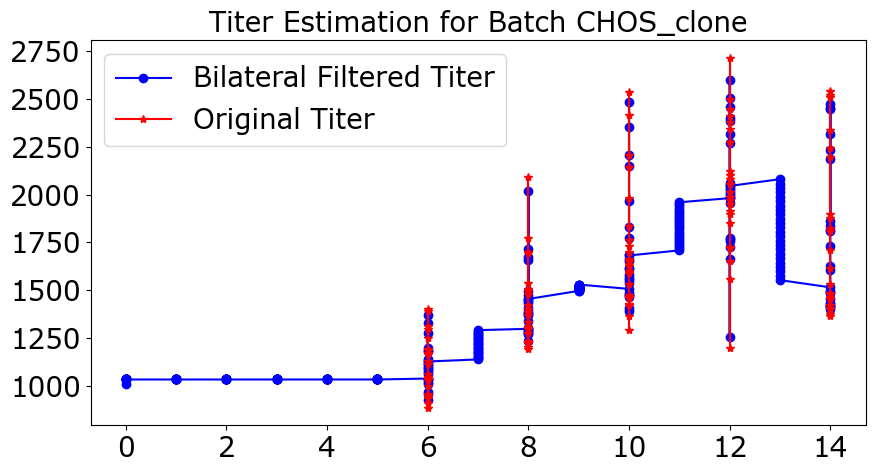

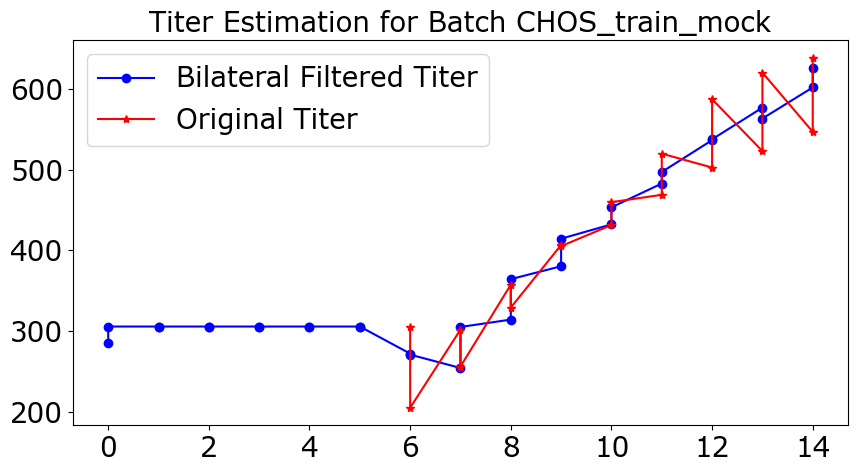

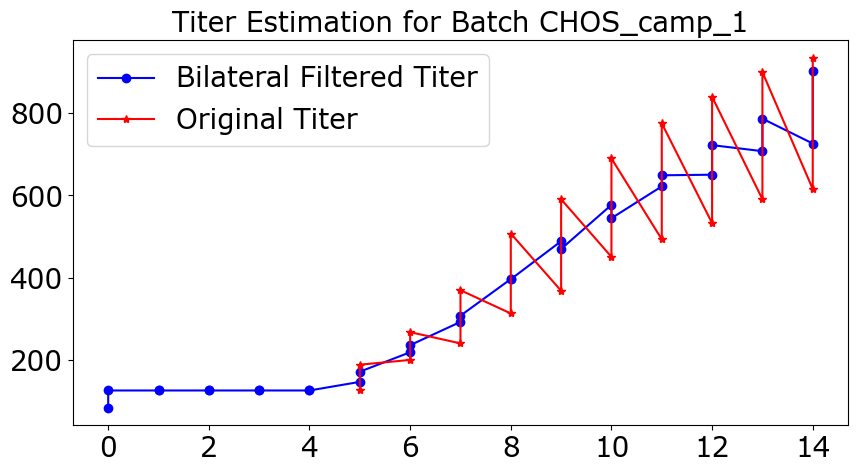

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
import itertools

# Padding classes
class ZeroPadder:
    def __init__(self, padding_size):
        self.padding_size = padding_size

    def transform(self, seq):
        return np.pad(seq, (self.padding_size, self.padding_size), 'constant', constant_values=0)

class SamePadder:
    def __init__(self, padding_size):
        self.padding_size = padding_size

    def transform(self, seq):
        return np.pad(seq, (self.padding_size, self.padding_size), 'edge')

class IdenticalPadder:
    def __init__(self, padding_size):
        self.padding_size = padding_size

    def transform(self, seq):
        return seq

# BaseSpatialFilter and subclasses from filt.py
import abc

class BaseSpatialFilter():
    def __init__(self, win_size=3, padding="same", n_iter=1):
        assert win_size % 2 == 1, "window size must be odd value."
        assert padding in ("zero", "same", "identical"), "padding method has to be `zero`, `same` or `identical`."

        self.win_size = win_size
        self.padder = self.get_padder(padding, {"padding_size": win_size // 2})
        self.med_idx = win_size // 2
        self.n_iter = n_iter

    def fit(self, seq):
        self.seq_ = seq
        self.seq_padded_ = self.padder.transform(seq)
        return self

    def transform(self, seq):
        for i in range(self.n_iter):
            x = self.seq_padded_
            filt = [self._filt(np.array(xs)) for xs in self.window(x, n=self.win_size)]
            x = np.hstack(filt)
            self.seq_padded_ = self.padder.transform(x)
        return x

    def fit_transform(self, seq):
        self.fit(seq)
        return self.transform(seq)

    @abc.abstractmethod
    def _filt(self, sub_seq):
        pass

    @staticmethod
    def window(seq, n=3):
        it = iter(seq)
        result = tuple(itertools.islice(it, n))
        if len(result) == n:
            yield result
        for elem in it:
            result = result[1:] + (elem,)
            yield result

    @staticmethod
    def get_padder(padding, kwargs):
        if padding == "zero":
            return ZeroPadder(**kwargs)
        elif padding == "same":
            return SamePadder(**kwargs)
        elif padding == "identical":
            return IdenticalPadder(**kwargs)
        else:
            raise ValueError(f"Unknown padding method: {padding}")

class BilateralFilter(BaseSpatialFilter):
    def __init__(self, win_size, padding="same", n_iter=1, sigma_d=None, sigma_i=None):
        super().__init__(win_size, padding, n_iter)
        if sigma_d is None:
            sigma_d = self._suggest_sigma_d()
        self.sigma_d = sigma_d
        self.weight = norm.pdf(np.arange(win_size), loc=self.med_idx, scale=self.sigma_d)
        self.weight /= self.weight.sum()
        self.sigma_i = sigma_i

    def _filt(self, sub_seq):
        if self.sigma_i is None:
            self.sigma_i = self._suggest_sigma_i()
        w = norm.pdf(sub_seq, loc=sub_seq[self.med_idx], scale=self.sigma_i)
        weight = self.weight * w
        weight /= weight.sum()
        prod = weight.reshape(1, -1) @ sub_seq.reshape(-1, 1)
        return prod[0, 0]

    def _suggest_sigma_i(self):
        x = self.seq_
        return (x.max() - x.min()) / 100.0


# Example implementation for BilateralFilter
def bilateral_filter(data, win_size=5, padding="same", n_iter=1, sigma_d=None, sigma_i=None):
    filter = BilateralFilter(win_size=win_size, padding=padding, n_iter=n_iter, sigma_d=sigma_d, sigma_i=sigma_i)
    return filter.fit_transform(data)

# Apply Wiener filter
def apply_wiener_filter(data):
    print("Applying Wiener filter")
    filtered_data = wiener(data, mysize=None, noise=None)
    return filtered_data

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Main function to impute and filter data using bilateral filter and Wiener filter
def impute_and_filter(dataframes):
    results = []

    for batch_name, batch_data in dataframes.items():
        time_vector = batch_data['production_day'].to_numpy()
        titer_values = batch_data['titer_octet_mgl'].to_numpy()

        # Create a mask for missing values
        missing_mask = np.isnan(titer_values)

        # Interpolate to handle NaNs for bilateral filter
        titer_interpolated = pd.Series(titer_values).interpolate(method='linear', limit_direction='both').to_numpy()

        # Apply bilateral filter to the interpolated data
        imputed_titer = bilateral_filter(titer_interpolated, win_size=5, sigma_d=1.0, sigma_i=1.0)

        # Apply Wiener filter to smooth the imputed data
        filtered_titer = apply_wiener_filter(imputed_titer)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(titer_values[~missing_mask], filtered_titer[~missing_mask]))
        mae = mean_absolute_error(titer_values[~missing_mask], filtered_titer[~missing_mask])
        mape = mean_absolute_percentage_error(titer_values[~missing_mask], filtered_titer[~missing_mask])


        # Store the results
        filtered_df = pd.DataFrame({
            'production_day': time_vector,
            'original_titer': titer_values,
            'imputed_titer': imputed_titer,
            'filtered_titer': filtered_titer
        })
        results.append((filtered_df, batch_name, rmse, mae, mape))

    return results

# Example usage
# Assuming 'dataframes' is a dictionary loaded with the necessary data
results = impute_and_filter(dataframes)
file_url = r'C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research\titer\Results\Bilateral Filters\Jackson'


# Example results output
for batch_data, batch_name, rmse, mae, mape in results:
    print(f'Batch {batch_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')
    
# Plotting results
for batch_data, batch_name,  rmse, mae, mape in results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['production_day'], batch_data['filtered_titer'], marker='o', linestyle='-', color='b', label='Bilateral Filtered Titer')
    plt.plot(batch_data['production_day'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer')
    plt.title(f'Titer Estimation for Batch {batch_name}', fontsize=font_size)
    # plt.xlabel('Production Days')
    # plt.ylabel('Titer (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size)
    plt.savefig(f'{file_url}\Bilateral_{batch_name}.png')
    plt.show()



Applying Wiener filter
Applying Wiener filter
Applying Wiener filter
Applying Wiener filter


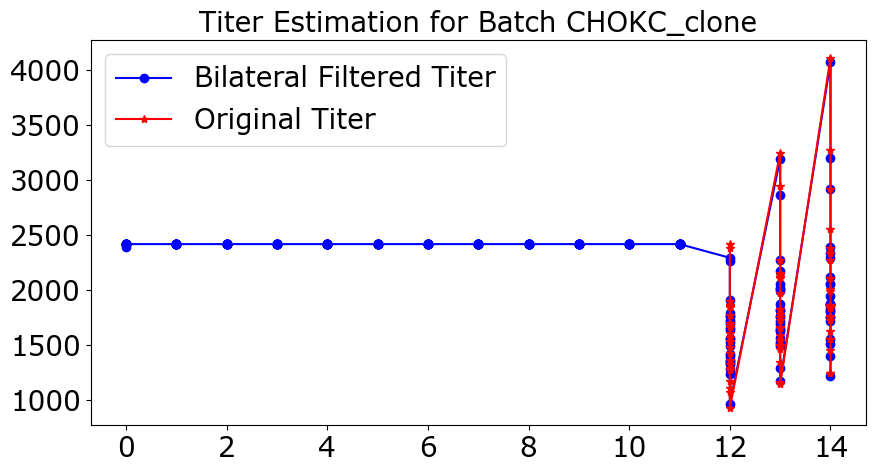

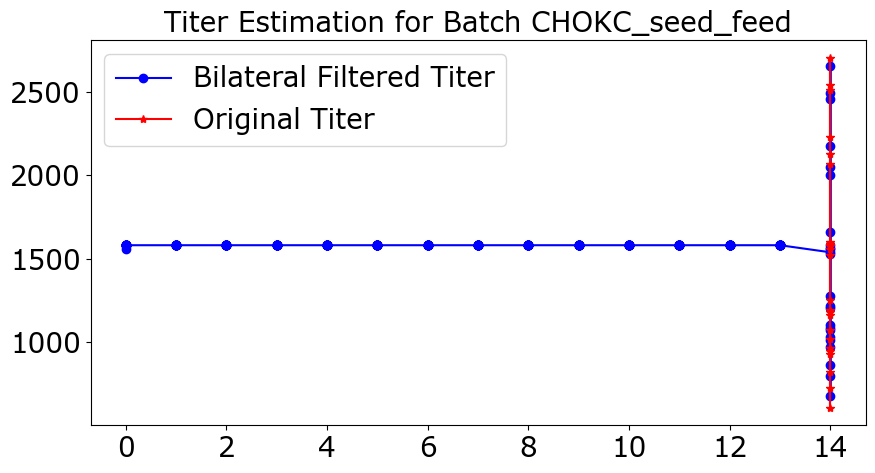

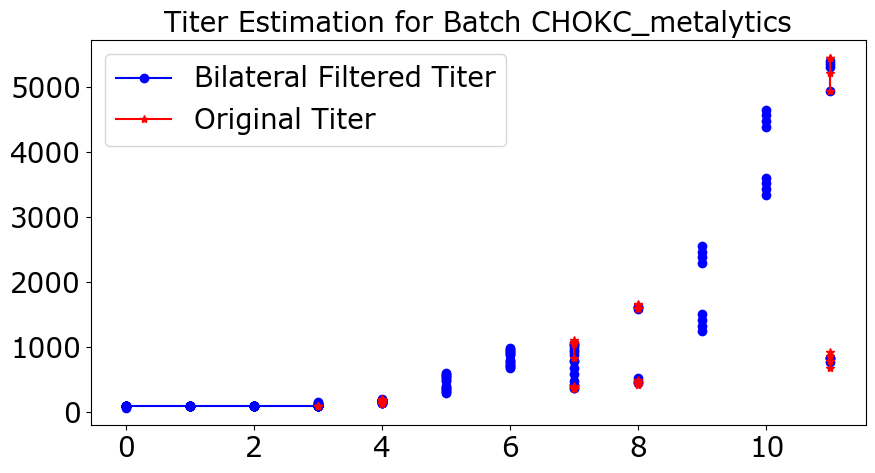

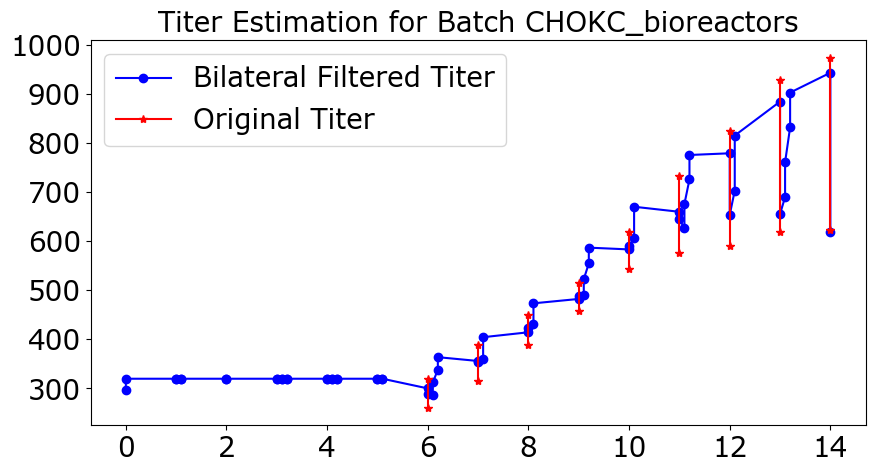

In [26]:

results = impute_and_filter(dataframes_okc)

# Plotting results
for batch_data, batch_name in results:
    plt.figure(figsize=(10, 5))
    plt.plot(batch_data['production_day'], batch_data['filtered_titer'], marker='o', linestyle='-', color='b', label='Bilateral Filtered Titer')
    plt.plot(batch_data['production_day'], batch_data['original_titer'], marker='*', linestyle='-', color='r', label='Original Titer')
    plt.title(f'Titer Estimation for Batch {batch_name}', fontsize=font_size)
    # plt.xlabel('Production Days')
    # plt.ylabel('Titer (mg/L)')
    plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size)
    plt.savefig(f'{file_url}\Bilateral_{batch_name}.png')
    plt.show()